## Hello. This notebook is solely focused on the analysis of the factors responsible for getting a loan and then performing prediction the Risk scores using those factors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score,GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan=pd.read_csv('Loan.csv')
loan.head()

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972         11    126928   
1    3309.083333                   0.935132          3     43609   
2    3393.666667                   0.872241          6      5205   
3    5757.000000                   0.896155          5     99452   
4    8605.333333                   0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [4]:
loan.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

#### No presence of null values.

- #### ApplicationDate: Loan application date
- #### Age: Applicant's age
- #### AnnualIncome: Yearly income
- #### CreditScore: Creditworthiness score
- #### EmploymentStatus: Job situation
- #### EducationLevel: Highest education attained
- #### Experience: Work experience
- #### LoanAmount: Requested loan size
- #### LoanDuration: Loan repayment period
- #### MaritalStatus: Applicant's marital state
- #### NumberOfDependents: Number of dependents
- #### HomeOwnershipStatus: Homeownership type
- #### MonthlyDebtPayments: Monthly debt obligations
- #### CreditCardUtilizationRate: Credit card usage percentage
- #### NumberOfOpenCreditLines: Active credit lines
- #### NumberOfCreditInquiries: Credit checks count
- #### DebtToIncomeRatio: Debt to income proportion
- #### BankruptcyHistory: Bankruptcy records
- #### LoanPurpose: Reason for loan
- #### PreviousLoanDefaults: Prior loan defaults
- #### PaymentHistory: Past payment behavior
- #### LengthOfCreditHistory: Credit history duration
- #### SavingsAccountBalance: Savings account amount
- #### CheckingAccountBalance: Checking account funds
- #### TotalAssets: Total owned assets
- #### TotalLiabilities: Total owed debts
- #### MonthlyIncome: Income per month
- #### UtilityBillsPaymentHistory: Utility payment record
- #### JobTenure: Job duration
- #### NetWorth: Total financial worth
- #### BaseInterestRate: Starting interest rate
- #### InterestRate: Applied interest rate
- #### MonthlyLoanPayment: Monthly loan payment
- #### TotalDebtToIncomeRatio: Total debt against income
- #### LoanApproved: Loan approval status
- #### RiskScore: Risk assessment score

In [5]:
loan.describe()

Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507609   
min       12.000000            0.000000            50.000000   
25%       36.000000            0.000000           286.000000   
50%       48.000000            1.000000           402.000000   
75%       72.000000            2.000000           564.000000   
max      120.000000            5.000000          2919.000000   

       CreditCardUtilizationRate  NumberOfOpenCreditLines  ...  MonthlyIncome  \
count               20000.000000             20000.000000  ...   20000.000000   
mean                    0.286381                 3.023350  ...    4891.715521   
std                     0.159793                 1.736161  ...    3296.771598   
min                     0.000974                 0.000000  ...    1250.000000   
25%                     0.160794                 2.000000  ...    2629.583333   
50%                     0.266673                 3.000000  ...    4034.750000   
75%                     0.390634                 4.000000  ...    6163.000000   
max                     0.917380                13.000000  ...   25000.000000   

       UtilityBillsPaymentHistory     JobTenure      NetWorth  \
count                20000.000000  20000.000000  2.000000e+04   
mean                     0.799918      5.002650  7.229432e+04   
std                      0.120665      2.236804  1.179200e+05   
min                      0.259203      0.000000  1.000000e+03   
25%                      0.727379      3.000000  8.734750e+03   
50%                      0.820962      5.000000  3.285550e+04   
75%                      0.892333      6.000000  8.882550e+04   
max                      0.999433     16.000000  2.603208e+06   

       BaseInterestRate  InterestRate  MonthlyLoanPayment  \
count      20000.000000  20000.000000        20000.000000   
mean           0.239124      0.239110          911.607052   
std            0.035509      0.042205          674.583473   
min            0.130101      0.113310           97.030193   
25%            0.213889      0.209142          493.763700   
50%            0.236157      0.235390          728.511452   
75%            0.261533      0.265532         1112.770759   
max            0.405029      0.446787        10892.629520   

       TotalDebtToIncomeRatio  LoanApproved     RiskScore  
count            20000.000000  20000.000000  20000.000000  
mean                 0.402182      0.239000     50.766780  
std                  0.338924      0.426483      7.778262  
min                  0.016043      0.000000     28.800000  
25%                  0.179693      0.000000     46.000000  
50%                  0.302711      0.000000     52.000000  
75%                  0.509214      0.000000     56.000000  
max                  4.647657      1.000000     84.000000  

[8 rows x 30 columns]

#### The average age of Applicants applying for a loan is around 40 i.e., middle-aged having annual income around 60,000 per year. 

#### Since their are multiple columns and every column could have a significant impact on the Risk Score we visualize every 9 column with Risk Score at once.

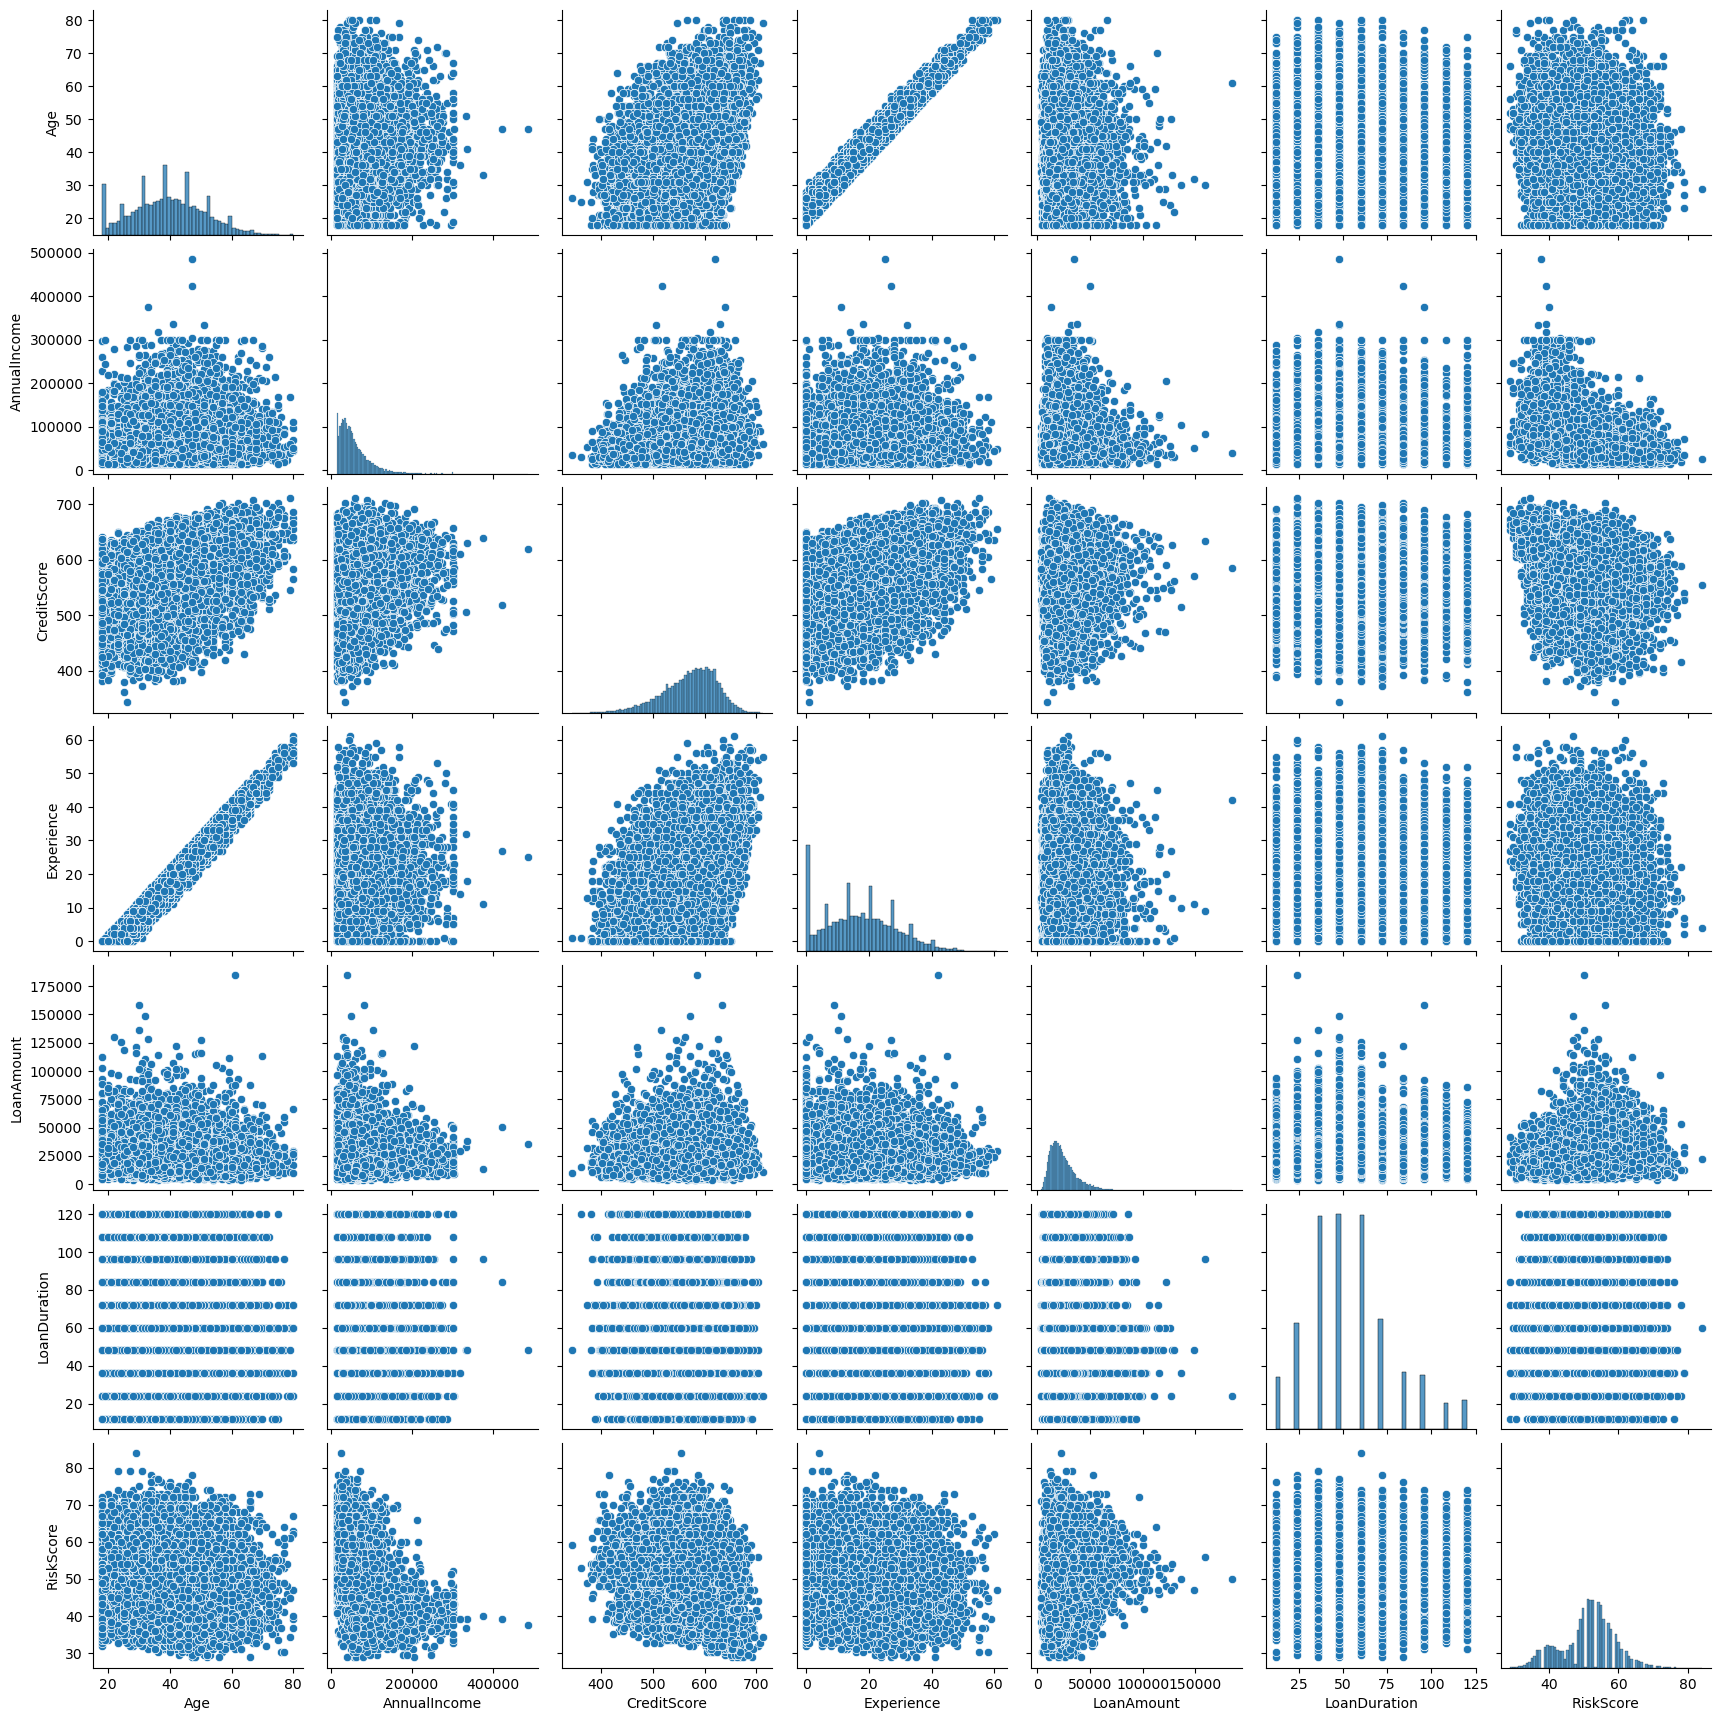

In [6]:
sns.pairplot(pd.concat([loan[loan.columns[:9]], loan[['RiskScore']]], axis=1))

#### 'Age' is not particularly linear with 'Risk Score' since it shows us a huge cluster where it seems that a young person may have high risk score and also can have a low score while the same goes for an aged person.

#### A higher 'Annual Income' can suggest you a somewhat of a low 'Risk Score'.

#### A good 'Credit Score' seems to have a good impact on a low 'Risk Score'.

#### 'Experience' is same as is the 'Age'. Also it is obvious that as 'Age' increases so is the 'Experience'. So it is hard to say with only 'Age' and 'Experience' what will be the 'Risk Score' of a person. 

#### Lower 'Loan Amount' can too have a lower 'Risk Score'.
#### Although 'Loan Duration' doesn't seems to have any particular kind of relationship with the 'Risk Score'.

#### "Number of Dependents' i.e. family size doesn't seem to have any impact on the 'Risk score'.

#### 'Monthly Debt Payments' in general doesn't seem to bother changes in 'Risk Score' but I believe combined with other variables such as income and family size, etc., can be assessed for analyzing 'Risk Score'.

#### 'Credit Card Utilization rate' can be somewhat good for detecting 'Risk Score'.

#### 'Number of open credit lines' , 'Number of Credit Inquires' is nor good nor bad for 'Risk Score'.

#### As I said earlier, 'Monthly Debt Payments' combined with 'Annual Income' and all can be predictor for 'Risk Score'. So that has been showed by 'Debt to Income ratio'. Lower debt ratio brings higher score and higher debt being lower.

#### Nothing much can be interpreted from 'Bankruptcy history'.

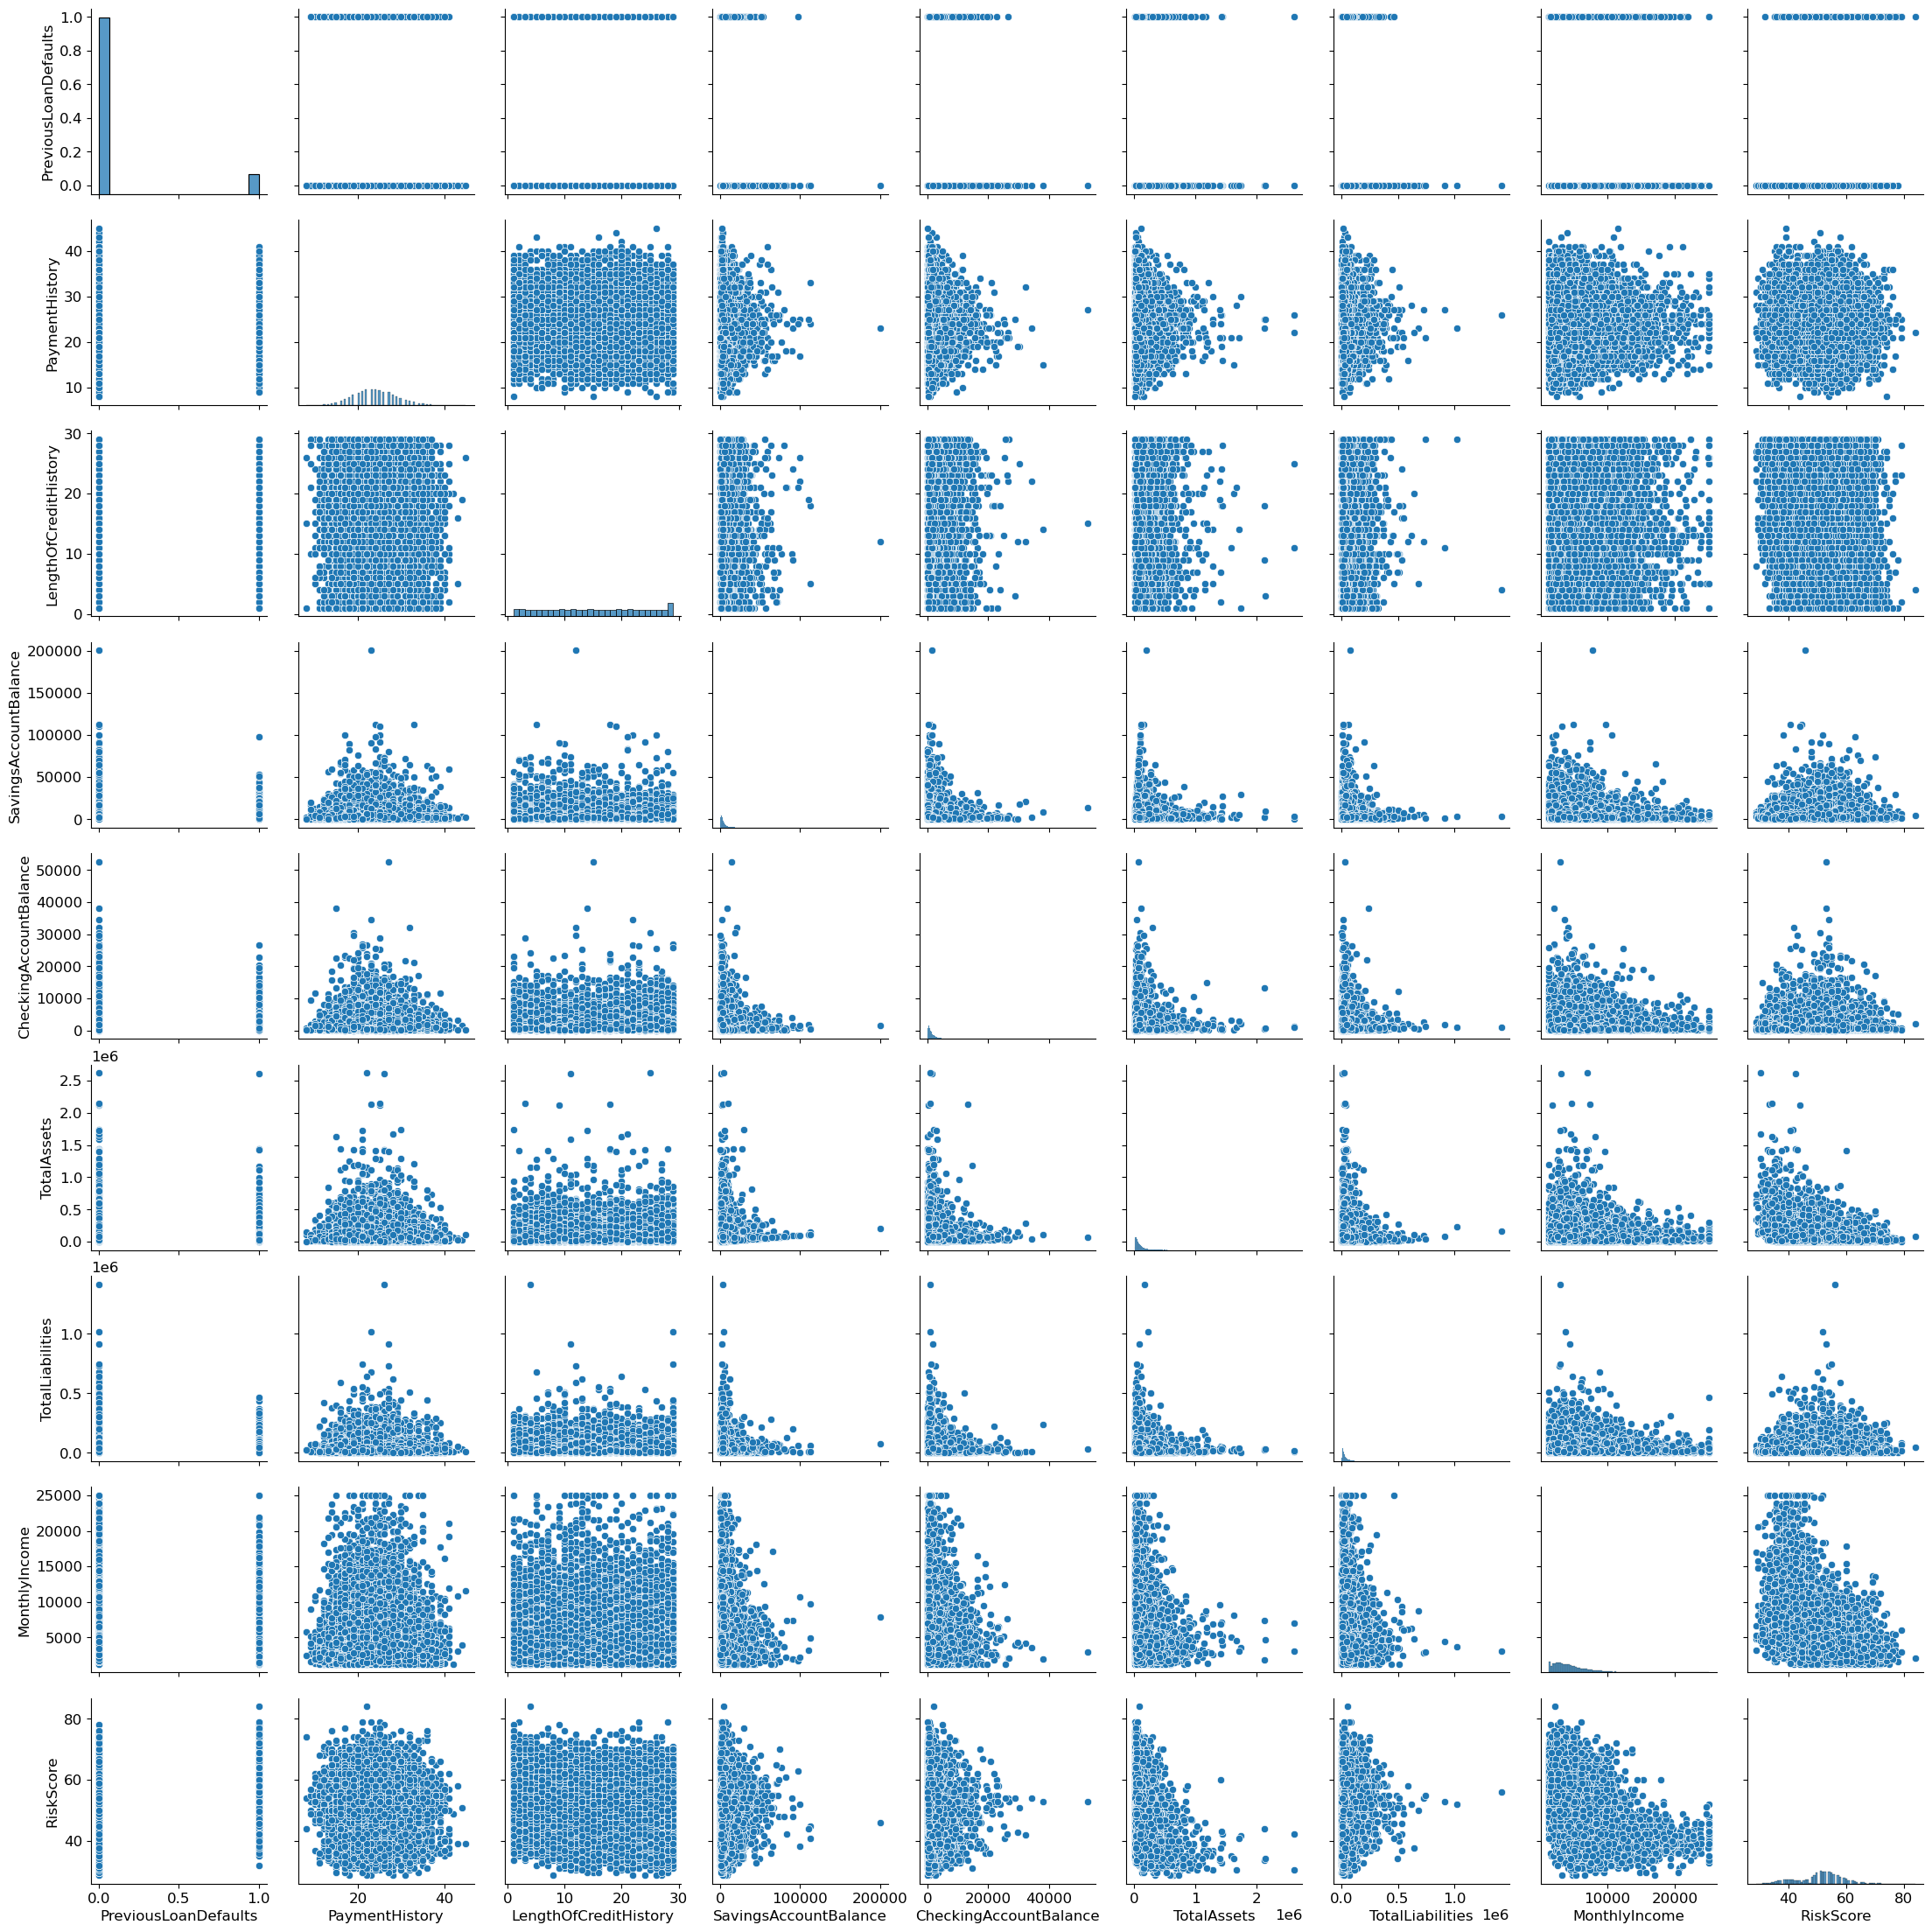

In [7]:
plt.rcParams.update({'font.size': 12})
sns.pairplot(pd.concat([loan[loan.columns[19:27]], loan[['RiskScore']]], axis=1))

#### Nothing much can be said from 'Prior loan default'.

#### 'Payment History' have a scattered relation with the 'Risk Score' so does "Length of Credit History'.

#### 'Savings Account Balance' and 'Checking Account Balance' seems to be the same variable. Though neither of them have any negative or positive relationship with 'Risk Score' it is better to remove any one of them since both serves the same purpose and can result in multicollinearity.

#### Higher the "Total Number of Assets" and 'Monthly Income", lower is the "Risk Score'.

#### "Total Liabilities" can be said proportional to the "Debt to Income Ratio". So it can affect "Risk Score" but it does seem same as the "Debt to Income ratio" variable.

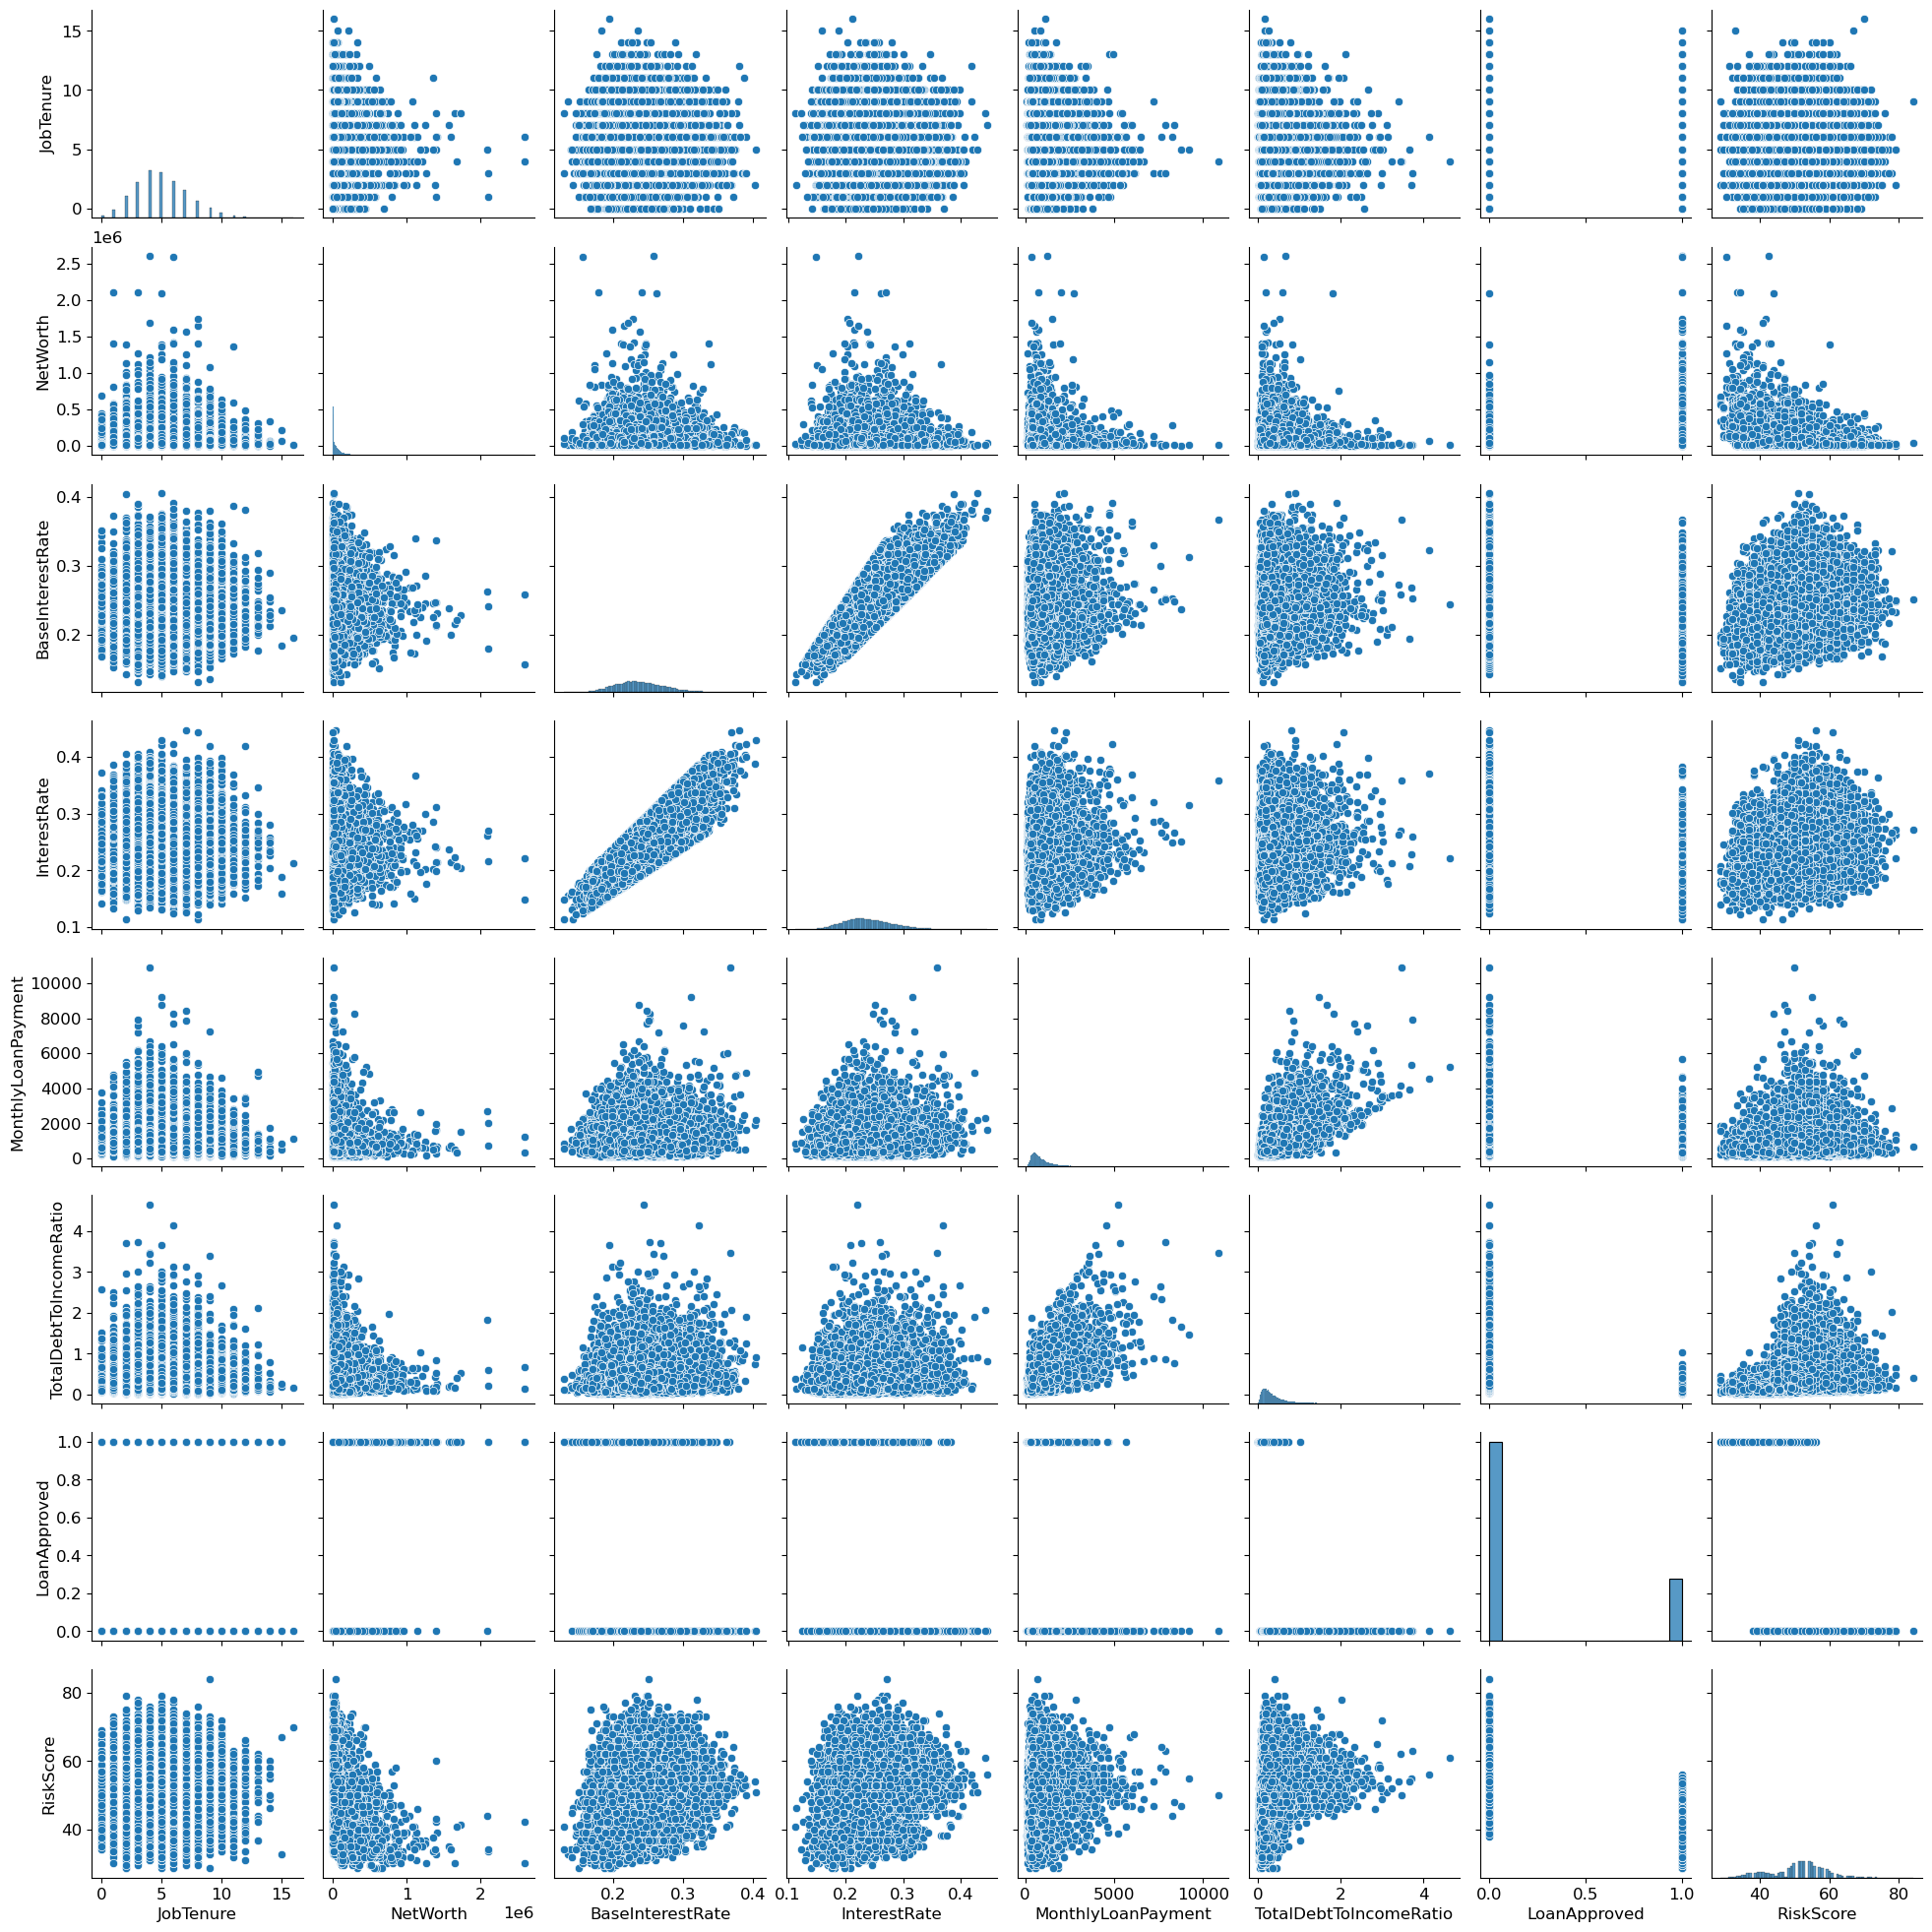

In [8]:
plt.rcParams.update({'font.size': 12})
sns.pairplot(pd.concat([loan[loan.columns[28:35]], loan[['RiskScore']]], axis=1))

#### "Job Tenure" doesn't seem to have any particular kind of relation with the "Risk Score".

#### More your "Net Worth" somewhat less is your "Risk". (Altough it is obvious your net worth is high when you have higher annual income)

#### Lower "Interest rate" and "Base Interest rate" can have a lower "Risk Score".

#### "Monthly Loan Payment" and "Total Debt to Income Ratio" seems to be similar in patterns of "Risk Score" as it cannot be said if lower debt or lower monthly loan payment can have a lower risk score.

In [9]:
loan.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

#### "Loan Approved"  is just ..... approved or not. Nothing much.

#### I have categorized the variables into distinct clusters based on their similarity or potential relationships. This segmentation aims to streamline the analysis process:

#### 1. Monetary Assets
- ####  AnnualIncome
- ####  MonthlyIncome
- ####  NetWorth
- ####  TotalAssets
- ####  HomeOwnershipStatus
- ####  SavingsAccountBalance
- ####  CheckingAccountBalance
 
#### 2. Variables That may or may not contribute to Risk Score
- ####  ApplicationDate
- ####  Age
- ####  EducationLevel
- ####  EmploymentStatus
- ####  Experience
- ####  MaritalStatus
- ####  NumberOfDependents
- ####  JobTenure
- ####  LoanPurpose
     
#### 3. Credit History
- ####  CreditScore
- ####  CreditCardUtilizationRate
- ####  NumberOfOpenCreditLines
- ####  NumberOfCreditInquiries
- ####  LengthOfCreditHistory
 
#### 4. Details related to Loan
- ####  LoanAmount
- ####  LoanDuration
- ####  PreviousLoanDefaults
- ####  PaymentHistory
- ####  BaseInterestRate
- ####  InterestRate
- ####  MonthlyLoanPayment
- ####  LoanApproved
     
#### 5. Liabilities / Expenses
- ####  MonthlyDebtPayments
- ####  DebtToIncomeRatio
- ####  BankruptcyHistory
- ####  TotalLiabilities
- ####  UtilityBillsPaymentHistory
- ####  MonthlyLoanPayment
- ####  TotalDebtToIncomeRatio

## Let's start.

#### 1. Monetary Assets
- ####  AnnualIncome
- ####  MonthlyIncome
- ####  NetWorth
- ####  TotalAssets
- ####  HomeOwnershipStatus
- ####  SavingsAccountBalance
- ####  CheckingAccountBalance

#### Let's start with the Home.

In [10]:
loan.HomeOwnershipStatus.value_counts()

HomeOwnershipStatus
Mortgage    7939
Rent        6087
Own         3938
Other       2036
Name: count, dtype: int64

In [11]:
loan.groupby('HomeOwnershipStatus')['RiskScore'].describe()

count       mean       std   min   25%   50%   75%   max
HomeOwnershipStatus                                                           
Mortgage             7939.0  50.687769  7.808186  28.8  45.6  52.0  56.0  79.0
Other                2036.0  51.089784  7.574684  28.8  47.0  52.0  56.0  84.0
Own                  3938.0  50.685018  7.882544  29.6  45.6  52.0  56.0  79.0
Rent                 6087.0  50.814687  7.737042  28.8  46.0  52.0  56.0  79.0

#### The risk scores in all of the categories of Home Ownership are almost similar. People with their own house have similiar risk score to that of a person with a house that is in mortgage or maybe rent or other.

#### Let's find out if income has something to do with people owning their own house or living in rent.

<Axes: xlabel='HomeOwnershipStatus', ylabel='AnnualIncome'>

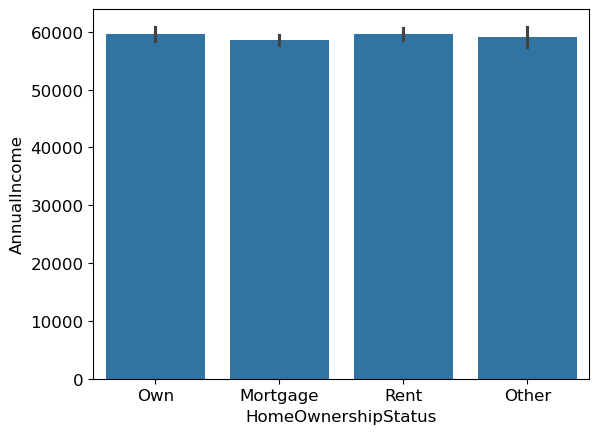

In [12]:
sns.barplot(x="HomeOwnershipStatus", y="AnnualIncome", data=loan,estimator=np.mean)

#### As it seems that there is no apparent reason for people to live in rent house or houses being in mortgage afterall higher annual income cannot even interpret that.

#### Let's check how much does people save from their earnings?

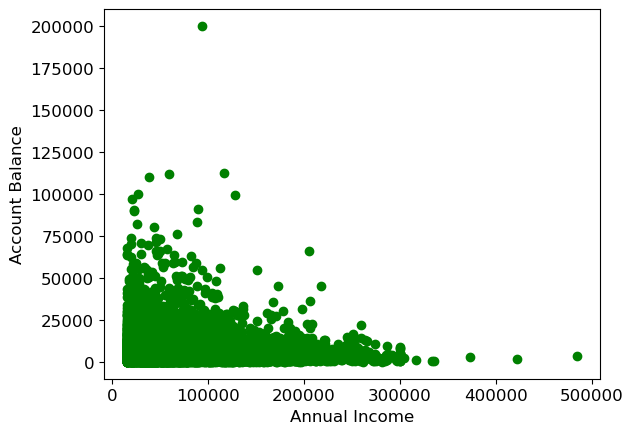

In [13]:
plt.scatter(x='AnnualIncome',y='SavingsAccountBalance',data=loan,c='green')
plt.xlabel('Annual Income')
plt.ylabel('Account Balance')
plt.show()

#### People seems to lose their savings even if they tend to have earned more. Let's find out the reason.

#### For that, we will be using some variables from the Liabilities/Expenses cluster to find out which variable is contributing to the low savings 

In [14]:
savings_df=loan[['AnnualIncome','MonthlyDebtPayments','TotalLiabilities','UtilityBillsPaymentHistory','MonthlyLoanPayment','SavingsAccountBalance']]
savings_df.head()

AnnualIncome  MonthlyDebtPayments  TotalLiabilities  \
0         39948                  183             19183   
1         39709                  496              9595   
2         40724                  902            128874   
3         69084                  755              5370   
4        103264                  274             17286   

   UtilityBillsPaymentHistory  MonthlyLoanPayment  SavingsAccountBalance  
0                    0.724972          419.805992                   7632  
1                    0.935132          794.054238                   4627  
2                    0.872241          666.406688                    886  
3                    0.896155         1047.506980                   1675  
4                    0.941369          330.179140                   1555

<Axes: >

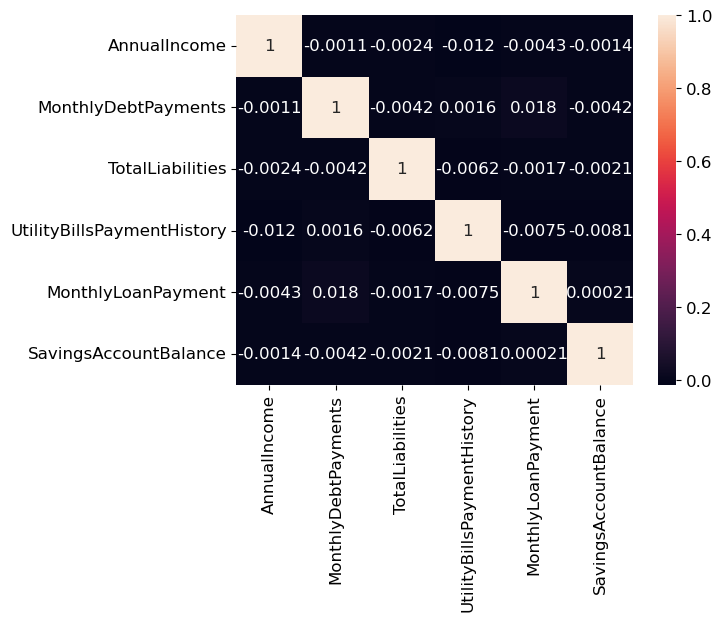

In [15]:
sns.heatmap(savings_df.corr(),annot=True)

#### From the above correlation graph, no particular variables can be found that contributes to the lower savings. Now let's check if larger debts can help determine.

In [16]:
loan[['AnnualIncome','TotalDebtToIncomeRatio']].corr()

AnnualIncome  TotalDebtToIncomeRatio
AnnualIncome                1.000000               -0.532033
TotalDebtToIncomeRatio     -0.532033                1.000000

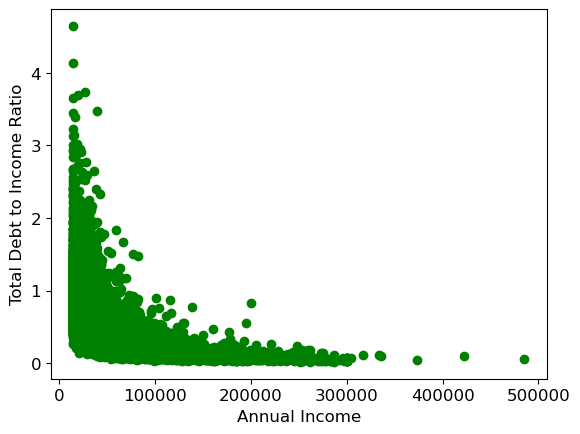

In [17]:
plt.scatter(x='AnnualIncome',y='TotalDebtToIncomeRatio',data=loan,c='green')
plt.xlabel('Annual Income')
plt.ylabel('Total Debt to Income Ratio')
plt.show()

#### Now, we can say that people with higher incomes tend to take higher amount of liabilities which may be the reason for the low savings.

#### So, the above theory is proved that people tend to gain more liabilites as they earn more.

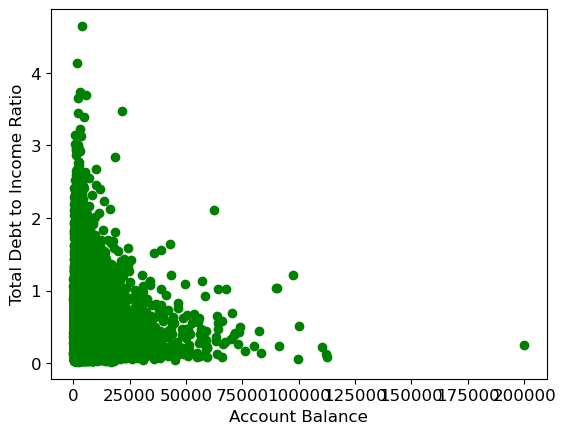

In [18]:
plt.scatter(x='SavingsAccountBalance',y='TotalDebtToIncomeRatio',data=loan,c='green')
plt.xlabel('Account Balance')
plt.ylabel('Total Debt to Income Ratio')
plt.show()

#### Also, this graph is sufficient to prove that high debts are the main reason for the low savings.

#### If debts are high, are the "Risk scores" too?

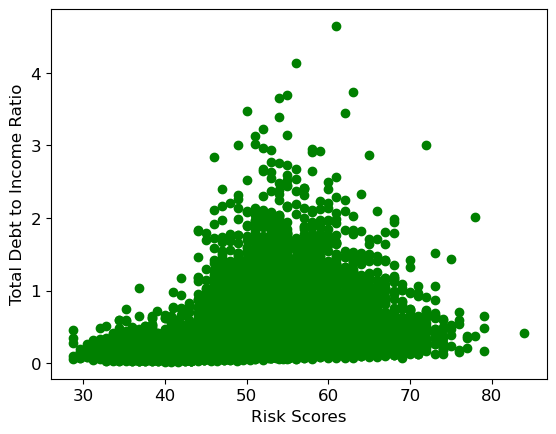

In [19]:
plt.scatter(x='RiskScore',y='TotalDebtToIncomeRatio',data=loan,c='green')
plt.xlabel('Risk Scores')
plt.ylabel('Total Debt to Income Ratio')
plt.show()

In [20]:
loan[['RiskScore','TotalDebtToIncomeRatio']].corr()

RiskScore  TotalDebtToIncomeRatio
RiskScore                1.000000                0.342643
TotalDebtToIncomeRatio   0.342643                1.000000

#### Somewhat, they seem so

#### Is that something to do with lower savings too?

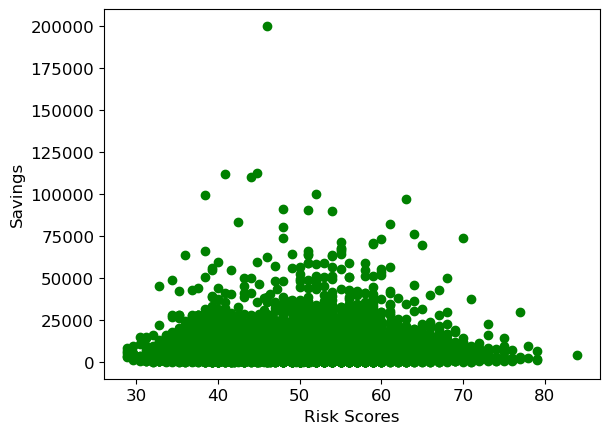

In [21]:
plt.scatter(x='RiskScore',y='SavingsAccountBalance',data=loan,c='green')
plt.xlabel('Risk Scores')
plt.ylabel('Savings')
plt.show()

In [22]:
loan[['SavingsAccountBalance','TotalDebtToIncomeRatio']].corr()

SavingsAccountBalance  TotalDebtToIncomeRatio
SavingsAccountBalance                1.000000               -0.003484
TotalDebtToIncomeRatio              -0.003484                1.000000

#### Well no. There is a small amount of correlation to prove that low savings can cause a higher risk score.

#### Let's check the other variables in this cluster.

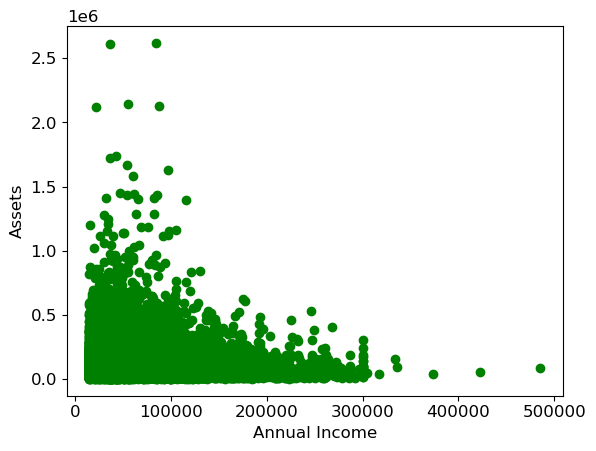

In [23]:
plt.scatter(x='AnnualIncome',y='TotalAssets',data=loan,c='green')
plt.xlabel('Annual Income')
plt.ylabel('Assets')
plt.show()

#### The plot doesn't reveal that people earning more is funding more in assets. Altough there are some people with low income who have more assets.

In [24]:
loan.groupby('HomeOwnershipStatus')['TotalAssets'].describe()

count          mean            std     min       25%  \
HomeOwnershipStatus                                                          
Mortgage             7939.0  96881.877315  122522.100357  2098.0  31555.00   
Other                2036.0  94910.173379  110636.292776  3490.0  31218.50   
Own                  3938.0  96096.732098  118421.715590  2370.0  30983.75   
Rent                 6087.0  98320.460325  123304.806781  2854.0  30877.50   

                         50%        75%        max  
HomeOwnershipStatus                                 
Mortgage             60769.0  115769.00  2619627.0  
Other                61349.5  118534.75  1665558.0  
Own                  60628.0  119691.50  2612797.0  
Rent                 60440.0  117569.50  2131807.0

In [25]:
loan.groupby('LoanPurpose')['TotalAssets'].describe()

count          mean            std     min       25%  \
LoanPurpose                                                                 
Auto                4034.0  98749.663857  123573.240747  2597.0  31684.00   
Debt Consolidation  5027.0  95232.810424  116305.112006  2854.0  31121.50   
Education           3008.0  95349.054189  111701.382615  2098.0  30993.75   
Home                5925.0  98057.779916  128335.614015  2370.0  30995.00   
Other               2006.0  96906.344467  116336.968895  2973.0  31263.00   

                        50%        75%        max  
LoanPurpose                                        
Auto                61266.0  119211.50  2131807.0  
Debt Consolidation  59402.0  114412.00  1739999.0  
Education           60714.0  116973.75  1432265.0  
Home                61510.0  118525.00  2619627.0  
Other               61301.0  117755.25  1585716.0

#### Altough it can be seen now that people keeping their 'homes' as mortgage have more amount set as 'assets'.

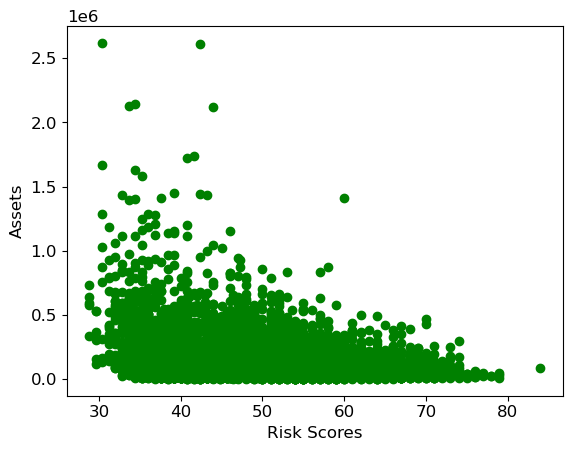

In [26]:
plt.scatter(y='TotalAssets',x='RiskScore',data=loan,c='green')
plt.xlabel('Risk Scores')
plt.ylabel('Assets')
plt.show()

#### It is somehow evident that higher number of assets can lower your Risk scores (not necessarily).

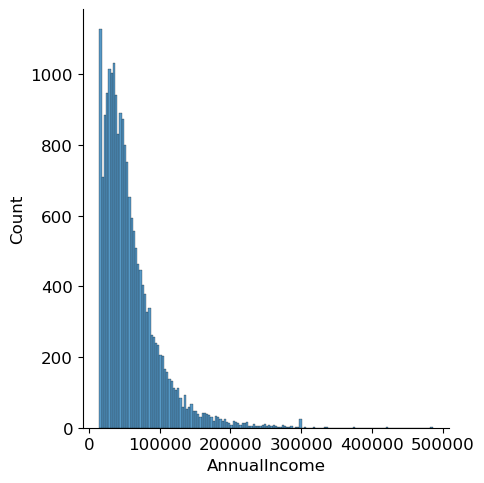

In [27]:
sns.displot(loan.AnnualIncome)

In [28]:
income_df=loan[['AnnualIncome','RiskScore']]

In [29]:
income_df['Income Bins'] = pd.cut(income_df['AnnualIncome'], bins=[0,100000,200000,300000,400000,500000],
                                  labels=['0-100000', '100000-200000', '200000-300000', '300000-400000', '400000-500000'])
income_df.groupby('Income Bins')['AnnualIncome'].describe()

count           mean           std       min        25%  \
Income Bins                                                                
0-100000       17490.0   47342.620640  21811.096240   15000.0   29724.00   
100000-200000   2262.0  130188.602122  25470.142664  100004.0  109332.00   
200000-300000    241.0  241276.995851  31403.042156  200273.0  213870.00   
300000-400000      5.0  332968.200000  26197.903880  304122.0  317379.00   
400000-500000      2.0  453910.500000  44449.439372  422480.0  438195.25   

                    50%        75%       max  
Income Bins                                   
0-100000        44104.5   62408.25   99975.0  
100000-200000  122517.5  145580.75  199969.0  
200000-300000  233389.0  262140.00  300000.0  
300000-400000  333715.0  335901.00  373724.0  
400000-500000  453910.5  469625.75  485341.0

In [30]:
filtered_data = income_df[income_df['Income Bins'].isin(['0-100000', '100000-200000'])]
mean_income = filtered_data['AnnualIncome'].mean()

In [31]:
mean_income

56830.14646618064

In [32]:
income_df.AnnualIncome.mean()

59161.47355

#### From the above analysis, we can say that most of the annual income is from 0 to 100000, which means the data is right skewed. Almost 99% of the data has average total income is around 56,000 whereas the total mean is 59,000.

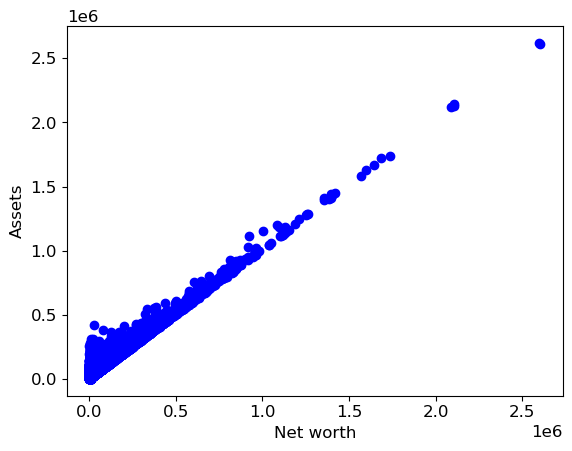

In [33]:
plt.scatter(x='NetWorth',y='TotalAssets',data=loan,c='blue')
plt.xlabel('Net worth')
plt.ylabel('Assets')
plt.show()

In [34]:
loan[['NetWorth','TotalAssets']].corr()

NetWorth  TotalAssets
NetWorth     1.000000     0.978997
TotalAssets  0.978997     1.000000

#### It can be said that the net worth of a person can be judged by the total number of assets.

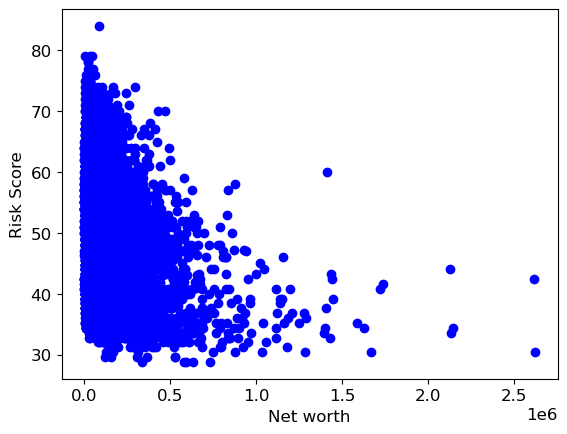

In [35]:
plt.scatter(x='TotalAssets',y='RiskScore',data=loan,c='blue')
plt.xlabel('Net worth')
plt.ylabel('Risk Score')
plt.show()

In [36]:
loan[['NetWorth','RiskScore']].corr()

NetWorth  RiskScore
NetWorth   1.000000  -0.304333
RiskScore -0.304333   1.000000

#### Thus, it is obvious for the Risk scores to decreases as someone's net worth increases or a person with a lot of assets.

#### 2. Variables That may or may not contribute to Risk Score
- ####  ApplicationDate
- ####  Age
- ####  EducationLevel
- ####  EmploymentStatus
- ####  Experience
- ####  MaritalStatus
- ####  NumberOfDependents
- ####  JobTenure
- ####  LoanPurpose

#### 'Application Date' cannot have any significance on detecting 'Risk scores'.

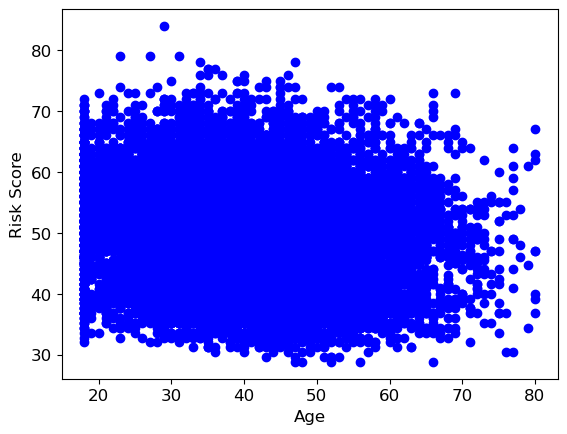

In [37]:
plt.scatter(x='Age',y='RiskScore',data=loan,c='blue')
plt.xlabel('Age')
plt.ylabel('Risk Score')
plt.show()

#### All I can say is that there is no Age limit for Risk Score.

#### Although I guess this can be assessed that which aged people are more likely to seek out for a loan.

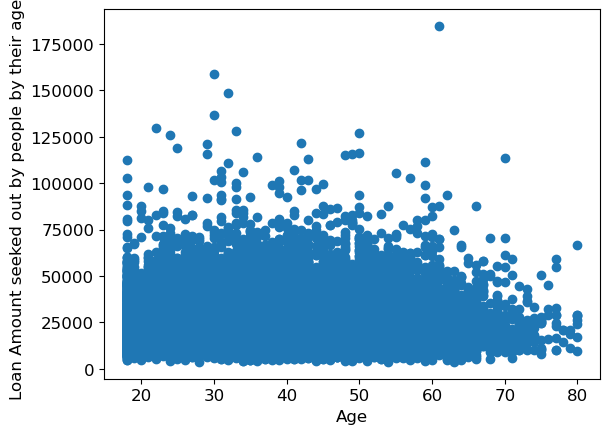

In [38]:
plt.scatter(x='Age',y='LoanAmount',data=loan)
plt.xlabel('Age')
plt.ylabel('Loan Amount seeked out by people by their ages')
plt.show()

In [39]:
loan[['Age','LoanAmount']].corr()

Age  LoanAmount
Age         1.000000   -0.007492
LoanAmount -0.007492    1.000000

#### Just correlation and scatter plot isn't enough to see if there is relation that more aged people are the ones to take more amount in loan. Let's bifurcate the age into groups and check.

In [40]:
loan['Age'].describe()

count    20000.000000
mean        39.752600
std         11.622713
min         18.000000
25%         32.000000
50%         40.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64

In [41]:
age_df=loan[['Age','EducationLevel','EmploymentStatus','Experience','MaritalStatus','NumberOfDependents',
             'JobTenure','LoanPurpose','LoanAmount','RiskScore']]

AgeGroup
15-30    24992.212175
30-45    24907.501879
45-60    24767.039762
60-75    24688.493557
75-90    26763.035714
Name: LoanAmount, dtype: float64


<Axes: title={'center': 'Average Loan Amount by Age Group'}, xlabel='AgeGroup'>

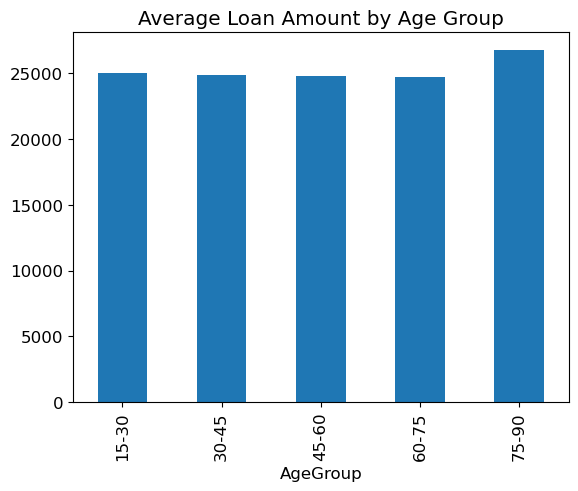

In [42]:
age_df['AgeGroup'] = pd.cut(age_df['Age'], bins=[15, 30, 45, 60, 75, 90], labels=['15-30', '30-45', '45-60', '60-75', '75-90'])
grouped_data = age_df.groupby('AgeGroup')['LoanAmount'].mean()
print(grouped_data)
grouped_data.plot(kind='bar', title='Average Loan Amount by Age Group')

#### Well there is no evidence that even after grouping the ages, the loan amount goes higher or lower if the age increases.

#### let's move onto the next variable 'Education Level'. Although from personal bias I don't think that Education level can have an impact in Risk Score.

In [43]:
loan.groupby('EducationLevel')['RiskScore'].describe()

count       mean       std   min   25%   50%   75%   max
EducationLevel                                                           
Associate       4034.0  51.342588  7.418888  28.8  47.2  52.0  56.0  78.0
Bachelor        6054.0  50.325140  7.978357  28.8  44.8  51.0  55.0  84.0
Doctorate        954.0  47.584486  8.670230  29.6  40.0  48.0  54.0  75.0
High School     5908.0  52.214421  6.969983  30.4  49.0  53.0  56.0  79.0
Master          3050.0  49.073049  8.314421  28.8  42.4  50.0  55.0  77.0

#### The average risk scores in every sector of education is around 50 which is almost the same as the overall mean of Risk scores.

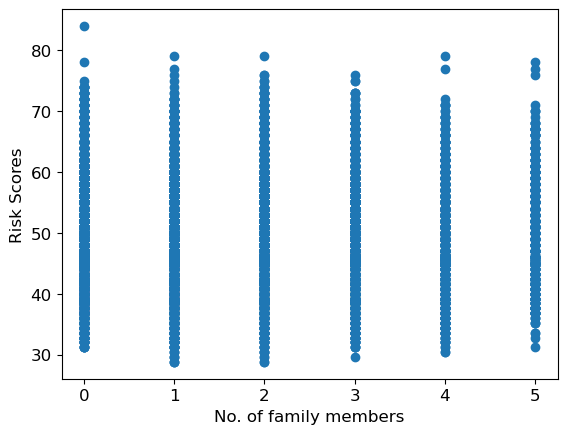

In [44]:
plt.scatter(x='NumberOfDependents',y='RiskScore',data=loan)
plt.xlabel('No. of family members')
plt.ylabel('Risk Scores')
plt.show()

In [45]:
loan.groupby('NumberOfDependents')['RiskScore'].describe()

count       mean       std   min   25%   50%   75%   max
NumberOfDependents                                                           
0                   6074.0  50.687784  7.774226  31.2  45.6  52.0  56.0  84.0
1                   5027.0  50.807798  7.796795  28.8  46.0  52.0  56.0  79.0
2                   3916.0  50.937743  7.771223  28.8  46.4  52.0  56.0  79.0
3                   3033.0  50.710320  7.707640  29.6  46.0  52.0  56.0  76.0
4                   1362.0  50.432452  7.806226  30.4  45.6  51.0  56.0  79.0
5                    588.0  51.159184  7.991203  31.2  45.6  52.0  56.0  78.0

#### According to the data, it is ok if you have more members in your family. They won't increase your Risk Score.

In [46]:
loan.groupby('MaritalStatus')['RiskScore'].describe()

count       mean       std   min   25%   50%   75%   max
MaritalStatus                                                            
Divorced        2882.0  50.521652  7.751792  29.6  45.6  52.0  56.0  79.0
Married        10041.0  50.735843  7.742328  28.8  46.0  52.0  56.0  84.0
Single          6078.0  50.889668  7.851121  28.8  46.0  52.0  56.0  78.0
Widowed          999.0  51.037237  7.758761  31.2  46.2  52.0  56.0  73.0

#### Same as the 'Number of dependents'. Marital Status isn't enough to judge.  

In [47]:
loan.groupby('MaritalStatus')['NumberOfDependents'].describe()

count      mean       std  min  25%  50%  75%  max
MaritalStatus                                                      
Divorced        2882.0  1.465996  1.378313  0.0  0.0  1.0  2.0  5.0
Married        10041.0  1.537895  1.382079  0.0  0.0  1.0  3.0  5.0
Single          6078.0  1.518921  1.396022  0.0  0.0  1.0  2.0  5.0
Widowed          999.0  1.448448  1.388868  0.0  0.0  1.0  2.0  5.0

#### Although it is weird to see that how a person even if he/she is single or divorced/single/widowed sometimes have 5 dependents.

In [48]:
dependents_df=loan[(loan['NumberOfDependents']>=3) & ((loan['MaritalStatus']=='Single') | (loan['MaritalStatus']=='Divorced') | (loan['MaritalStatus']=='Widowed'))]

In [49]:
dependents_df.describe()

Age   AnnualIncome  CreditScore   Experience     LoanAmount  \
count  2431.000000    2431.000000  2431.000000  2431.000000    2431.000000   
mean     39.726450   58132.894282   569.965858    17.483340   24615.266968   
std      11.663405   39151.464860    51.886241    11.344894   13779.981938   
min      18.000000   15000.000000   372.000000     0.000000    4044.000000   
25%      31.000000   31720.500000   538.000000     9.000000   15501.500000   
50%      39.000000   48426.000000   576.000000    17.000000   21338.000000   
75%      48.000000   73647.500000   608.000000    25.000000   29988.000000   
max      80.000000  300000.000000   712.000000    58.000000  129860.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count   2431.000000         2431.000000          2431.000000   
mean      54.037022            3.522419           456.040313   
std       24.418241            0.702297           240.702246   
min       12.000000            3.000000            81.000000   
25%       36.000000            3.000000           288.000000   
50%       48.000000            3.000000           406.000000   
75%       72.000000            4.000000           569.000000   
max      120.000000            5.000000          2390.000000   

       CreditCardUtilizationRate  NumberOfOpenCreditLines  ...  MonthlyIncome  \
count                2431.000000              2431.000000  ...    2431.000000   
mean                    0.291356                 3.008227  ...    4810.919889   
std                     0.165006                 1.749995  ...    3227.963645   
min                     0.005192                 0.000000  ...    1250.000000   
25%                     0.164804                 2.000000  ...    2629.333333   
50%                     0.268340                 3.000000  ...    4016.500000   
75%                     0.397329                 4.000000  ...    6058.666667   
max                     0.862205                 9.000000  ...   25000.000000   

       UtilityBillsPaymentHistory    JobTenure      NetWorth  \
count                 2431.000000  2431.000000  2.431000e+03   
mean                     0.800431     5.041547  7.245938e+04   
std                      0.119108     2.253009  1.237845e+05   
min                      0.276566     0.000000  1.055000e+03   
25%                      0.728506     3.000000  8.547000e+03   
50%                      0.818573     5.000000  3.479600e+04   
75%                      0.891102     6.000000  9.191400e+04   
max                      0.995689    14.000000  2.598936e+06   

       BaseInterestRate  InterestRate  MonthlyLoanPayment  \
count       2431.000000   2431.000000         2431.000000   
mean           0.239663      0.240010          902.120095   
std            0.036484      0.043190          683.913186   
min            0.130101      0.133168          124.992904   
25%            0.213151      0.209362          488.699193   
50%            0.236971      0.235285          709.980908   
75%            0.262663      0.267851         1081.885992   
max            0.391126      0.423362         7235.419792   

       TotalDebtToIncomeRatio  LoanApproved    RiskScore  
count             2431.000000   2431.000000  2431.000000  
mean                 0.406478      0.240230    50.972851  
std                  0.350000      0.427311     7.868254  
min                  0.017607      0.000000    30.400000  
25%                  0.177579      0.000000    46.000000  
50%                  0.299970      0.000000    52.000000  
75%                  0.500492      0.000000    56.000000  
max                  3.224208      1.000000    79.000000  

[8 rows x 30 columns]

In [50]:
dependents_df.groupby('NumberOfDependents')['AnnualIncome'].describe()

count          mean           std      min       25%  \
NumberOfDependents                                                          
3                   1457.0  58396.241592  39231.880858  15000.0  32289.00   
4                    678.0  57235.573746  37705.665617  15000.0  30283.25   
5                    296.0  58891.969595  42004.269082  15000.0  32237.25   

                        50%       75%       max  
NumberOfDependents                               
3                   47786.0  73755.00  300000.0  
4                   48988.0  72600.25  262140.0  
5                   49248.5  74214.00  300000.0

In [51]:
loan['AnnualIncome'].describe()

count     20000.000000
mean      59161.473550
std       40350.845168
min       15000.000000
25%       31679.000000
50%       48566.000000
75%       74391.000000
max      485341.000000
Name: AnnualIncome, dtype: float64

In [52]:
dependents_df.groupby('NumberOfDependents')['RiskScore'].describe()

count       mean       std   min   25%   50%   75%   max
NumberOfDependents                                                           
3                   1457.0  50.986685  7.733004  31.2  46.0  52.0  56.0  75.0
4                    678.0  50.927434  8.005223  30.4  46.0  52.0  56.0  79.0
5                    296.0  51.008784  8.230859  31.2  45.0  52.0  56.0  78.0

#### The risk scores are distributed evenly even if you have more family members despite being single, widowed or divorced but they have slightly higher income than the average people in this dataset.

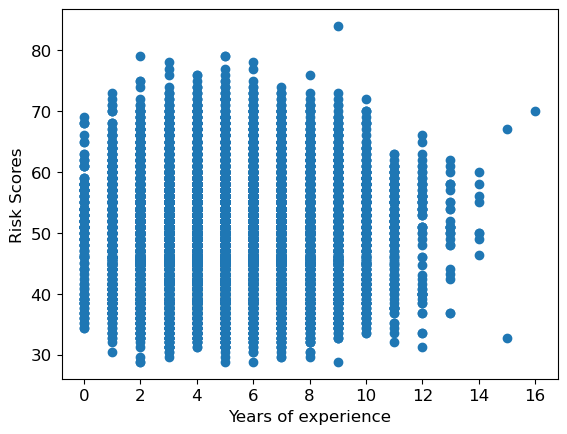

In [53]:
plt.scatter(x='JobTenure',y='RiskScore',data=loan)
plt.xlabel('Years of experience')
plt.ylabel('Risk Scores')
plt.show()

#### Job Tenure doesn't seem to show much significance in analyzing Risk scores.

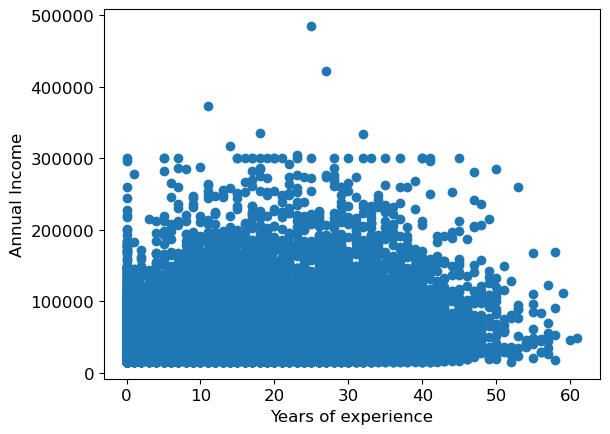

In [54]:
plt.scatter(x='Experience',y='AnnualIncome',data=loan)
plt.xlabel('Years of experience')
plt.ylabel('Annual Income')
plt.show()

In [55]:
loan[['Experience','AnnualIncome']].corr()

Experience  AnnualIncome
Experience      1.000000      0.145999
AnnualIncome    0.145999      1.000000

#### Annual Income should increase as the experience increases but this graph along with the correlation shows some different results.

#### These variables are checked with 'Annual Incomes' because it contributes in higher or lower Risk Scores, and if there is any relationship between Annual Income and the other variables, it can be determined the factors for a higher or lower annual income which can eventually lead to the Risk Scores.

In [56]:
loan.groupby('LoanPurpose')['AnnualIncome'].describe()

count          mean           std      min      25%  \
LoanPurpose                                                                
Auto                4034.0  59505.332920  41221.708269  15000.0  31423.5   
Debt Consolidation  5027.0  58702.564154  40252.807209  15000.0  31289.0   
Education           3008.0  60780.848737  41331.494021  15000.0  32796.5   
Home                5925.0  58953.753586  39467.603050  15000.0  31900.0   
Other               2006.0  57805.276670  39872.957159  15000.0  30791.0   

                        50%       75%       max  
LoanPurpose                                      
Auto                48697.5  74792.75  485341.0  
Debt Consolidation  47723.0  73788.50  317379.0  
Education           49677.5  75686.25  304122.0  
Home                49132.0  74291.00  422480.0  
Other               47195.0  72703.75  333715.0

In [57]:
loan.groupby('LoanPurpose')['RiskScore'].describe()

count       mean       std   min   25%   50%   75%   max
LoanPurpose                                                                  
Auto                4034.0  50.643183  7.755576  28.8  45.6  52.0  56.0  76.0
Debt Consolidation  5027.0  50.946330  7.820938  28.8  46.0  52.0  56.0  79.0
Education           3008.0  50.505253  7.769590  29.6  45.0  51.0  56.0  84.0
Home                5925.0  50.721215  7.759799  28.8  46.0  52.0  56.0  79.0
Other               2006.0  51.092124  7.770830  30.4  47.0  52.0  56.0  78.0

#### There cannot be seen much variation in each category of purposes that can highly affect risk scores.

#### 3. Credit History
- ####  CreditScore
- ####  CreditCardUtilizationRate
- ####  NumberOfOpenCreditLines
- ####  NumberOfCreditInquiries
- ####  LengthOfCreditHistory

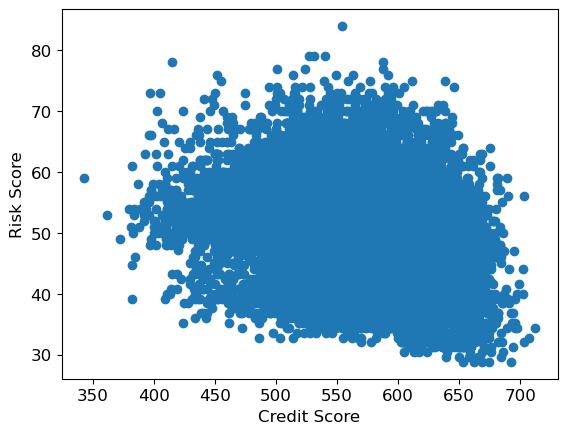

CreditScore  RiskScore
CreditScore     1.000000  -0.240198
RiskScore      -0.240198   1.000000

In [58]:
plt.scatter(x='CreditScore',y='RiskScore',data=loan)
plt.xlabel('Credit Score')
plt.ylabel('Risk Score')
plt.show()
loan[['CreditScore','RiskScore']].corr()

#### To some extent it can be said that Risk scores can be affected by low credit scores.

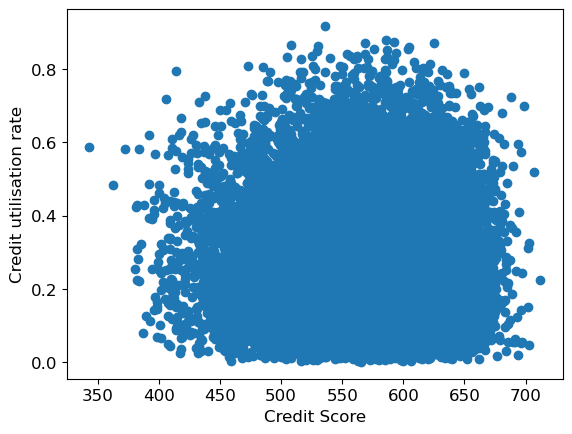

CreditScore  CreditCardUtilizationRate
CreditScore                    1.00000                   -0.00965
CreditCardUtilizationRate     -0.00965                    1.00000

In [59]:
plt.scatter(x='CreditScore',y='CreditCardUtilizationRate',data=loan)
plt.xlabel('Credit Score')
plt.ylabel('Credit utilisation rate')
plt.show()
loan[['CreditScore','CreditCardUtilizationRate']].corr()

In [60]:
loan[['RiskScore','CreditCardUtilizationRate']].corr()

RiskScore  CreditCardUtilizationRate
RiskScore                   1.000000                   0.108758
CreditCardUtilizationRate   0.108758                   1.000000

#### Although it was obvious that Credit Card Utilization rate cannot be used to detemine credit score, but maybe it can be used to determine the Risk scores. 

In [61]:
loan['CreditScore'].mean()

571.6124

In [62]:
loan.groupby('NumberOfOpenCreditLines')['CreditScore'].describe()

count        mean        std    min     25%    50%  \
NumberOfOpenCreditLines                                                        
0                         932.0  573.638412  52.043557  380.0  541.00  582.0   
1                        2945.0  572.195246  50.921284  362.0  541.00  578.0   
2                        4483.0  571.706670  51.299593  381.0  540.00  579.0   
3                        4571.0  571.000875  50.885670  396.0  541.00  578.0   
4                        3354.0  571.829457  49.710736  382.0  541.00  578.0   
5                        1930.0  571.168912  51.345630  343.0  539.00  577.0   
6                        1079.0  571.336423  51.842838  385.0  540.00  579.0   
7                         457.0  572.396061  51.995388  397.0  541.00  581.0   
8                         168.0  565.041667  53.461425  424.0  530.75  569.5   
9                          59.0  569.644068  55.221111  428.0  552.50  583.0   
10                         16.0  568.187500  53.958279  457.0  546.75  574.0   
11                          4.0  581.750000  54.652691  500.0  578.00  606.5   
12                          1.0  575.000000        NaN  575.0  575.00  575.0   
13                          1.0  638.000000        NaN  638.0  638.00  638.0   

                            75%    max  
NumberOfOpenCreditLines                 
0                        611.25  703.0  
1                        610.00  707.0  
2                        608.00  702.0  
3                        608.00  712.0  
4                        608.00  702.0  
5                        608.00  696.0  
6                        610.00  696.0  
7                        609.00  690.0  
8                        606.00  678.0  
9                        611.50  644.0  
10                       602.25  642.0  
11                       610.25  614.0  
12                       575.00  575.0  
13                       638.00  638.0

In [63]:
loan.groupby('NumberOfCreditInquiries')['CreditScore'].describe()

count        mean        std    min     25%    50%  \
NumberOfCreditInquiries                                                        
0                        7299.0  571.623236  50.928940  362.0  540.00  578.0   
1                        7506.0  571.799361  50.590738  372.0  540.00  579.0   
2                        3666.0  571.435897  52.109658  343.0  541.00  579.0   
3                        1185.0  570.138397  51.375335  380.0  539.00  574.0   
4                         272.0  576.216912  48.936294  406.0  550.75  580.0   
5                          56.0  567.553571  41.957519  439.0  538.75  574.5   
6                          13.0  562.846154  54.190784  457.0  527.00  551.0   
7                           3.0  571.666667  52.624456  515.0  548.00  581.0   

                            75%    max  
NumberOfCreditInquiries                 
0                        609.00  702.0  
1                        608.00  712.0  
2                        609.00  703.0  
3                        608.00  699.0  
4                        609.00  671.0  
5                        599.75  634.0  
6                        606.00  657.0  
7                        600.00  619.0

In [64]:
loan.groupby('LengthOfCreditHistory')['CreditScore'].describe()

count        mean        std    min     25%    50%  \
LengthOfCreditHistory                                                       
1                      732.0  570.678962  51.360499  406.0  541.00  577.0   
2                      725.0  568.395862  52.219593  393.0  534.00  576.0   
3                      691.0  568.641100  53.027679  397.0  534.00  575.0   
4                      649.0  571.796610  50.135267  417.0  541.00  580.0   
5                      665.0  569.308271  51.987050  388.0  537.00  577.0   
6                      667.0  574.470765  48.929351  412.0  541.50  581.0   
7                      663.0  573.707391  48.388927  414.0  541.00  580.0   
8                      681.0  571.647577  50.789088  389.0  539.00  578.0   
9                      737.0  572.301221  52.327474  392.0  542.00  581.0   
10                     708.0  571.385593  48.749101  412.0  542.00  574.5   
11                     740.0  570.377027  50.491385  397.0  539.75  579.0   
12                     681.0  574.922173  51.205969  362.0  544.00  582.0   
13                     675.0  571.256296  52.162305  382.0  536.00  577.0   
14                     715.0  573.141259  50.018914  399.0  544.00  579.0   
15                     628.0  574.753185  50.466954  407.0  543.75  582.0   
16                     708.0  570.946328  49.184984  407.0  540.00  579.0   
17                     692.0  570.731214  51.399179  416.0  541.75  578.0   
18                     695.0  570.469065  51.702668  381.0  539.00  578.0   
19                     725.0  570.449655  53.026489  343.0  539.00  576.0   
20                     690.0  571.702899  51.213576  387.0  541.00  578.0   
21                     713.0  569.492286  48.368149  402.0  542.00  575.0   
22                     625.0  573.742400  52.603127  385.0  538.00  584.0   
23                     669.0  572.792227  50.677862  408.0  542.00  577.0   
24                     670.0  574.077612  53.722477  380.0  546.00  581.0   
25                     678.0  572.197640  49.898738  409.0  539.00  580.0   
26                     706.0  570.063739  49.771366  372.0  541.00  577.0   
27                     688.0  573.361919  49.642519  402.0  542.75  580.0   
28                     736.0  571.347826  50.630890  382.0  541.00  578.0   
29                     648.0  569.657407  54.507291  396.0  535.75  578.0   

                          75%    max  
LengthOfCreditHistory                 
1                      608.00  681.0  
2                      607.00  688.0  
3                      607.00  702.0  
4                      609.00  686.0  
5                      607.00  703.0  
6                      610.00  686.0  
7                      610.50  697.0  
8                      610.00  696.0  
9                      611.00  675.0  
10                     606.00  696.0  
11                     607.00  683.0  
12                     611.00  707.0  
13                     610.00  679.0  
14                     611.00  694.0  
15                     612.00  681.0  
16                     607.00  695.0  
17                     609.25  683.0  
18                     608.00  702.0  
19                     609.00  673.0  
20                     607.00  691.0  
21                     604.00  680.0  
22                     612.00  693.0  
23                     608.00  703.0  
24                     611.00  697.0  
25                     608.00  690.0  
26                     606.00  692.0  
27                     609.00  687.0  
28                     608.25  712.0  
29                     609.00  699.0

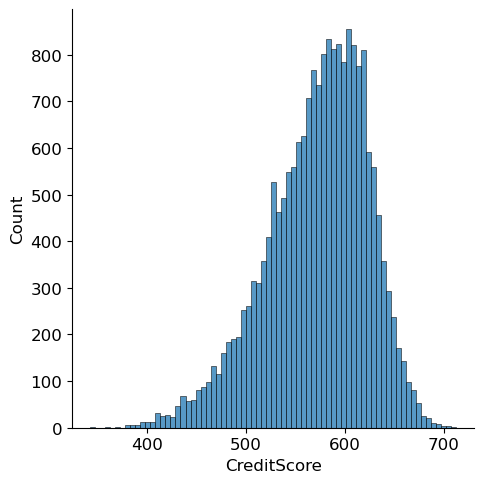

In [65]:
sns.displot(loan.CreditScore)

#### Neither of the number of open credit lines/inquires/history doesn't seem to affect Credit Scores that much as they are all around the average credit score. 

#### Also the distribution of Credit score is little left-skewed hence making some people having extraodinary high credit scores.

#### 4. Details related to Loan
- ####  LoanAmount
- ####  LoanDuration
- ####  PreviousLoanDefaults
- ####  PaymentHistory
- ####  BaseInterestRate
- ####  InterestRate
- ####  MonthlyLoanPayment
- ####  LoanApproved

#### Just looking at the variables without any analysis, we can say that maybe Interest Rates should be higher as higher the loan duration will be and so is the amount.

#### Here there are 2 types of Interest Rates -
#### i) Base Interest Rate- The minimum interest rate set by a central bank or a financial institution, serving as a benchmark for lending.
#### ii) Interest Rate - The rate a borrower pays to a lender for the use of funds, expressed as a percentage of the loan amount.

#### Let's start with the 'Loan Amount'.

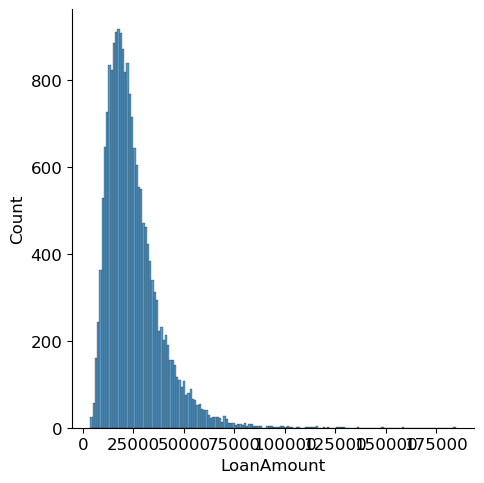

In [66]:
sns.displot(loan.LoanAmount)

In [67]:
loan.LoanAmount.describe()

count     20000.000000
mean      24882.867800
std       13427.421217
min        3674.000000
25%       15575.000000
50%       21914.500000
75%       30835.000000
max      184732.000000
Name: LoanAmount, dtype: float64

#### Although the average loans taken were around 25k, the maximum loan taken was almost 1.9 lakhs. So we see a bit of a stretch on the right side of the plot, hence making the distribution right skewed.

In [68]:
loan.groupby('LoanDuration')['LoanAmount'].describe()

count          mean           std     min       25%      50%  \
LoanDuration                                                                  
12             959.0  25244.452555  13403.350436  4578.0  16117.00  21955.0   
24            1972.0  24730.175963  13671.435965  4044.0  15504.75  22027.5   
36            3971.0  24786.101989  13259.577876  3674.0  15387.00  21874.0   
48            3991.0  24970.274868  13808.282630  4070.0  15618.00  21830.0   
60            3982.0  25020.119789  13613.336100  4173.0  15652.25  22000.0   
72            2046.0  24445.382698  12303.509833  3771.0  15626.75  21731.5   
84            1059.0  25240.271955  13401.493233  3961.0  15954.50  21885.0   
96            1001.0  24527.640360  13923.873584  4444.0  15286.00  21496.0   
108            482.0  26021.686722  13328.892480  5757.0  16754.25  23183.0   
120            537.0  24448.048417  12820.416403  4840.0  14992.00  21566.0   

                   75%       max  
LoanDuration                      
12            31509.00   93799.0  
24            30306.75  184732.0  
36            30814.50  136565.0  
48            30816.00  148776.0  
60            30853.00  125733.0  
72            30481.25  114322.0  
84            31606.00  121782.0  
96            29969.00  158686.0  
108           32281.25   87200.0  
120           30690.00   86257.0

#### Loan duration is provided in terms of months. Maximum duration for repayment is given as 10 years. But the amount doesn't seem to differ too much even if the duration is longer.

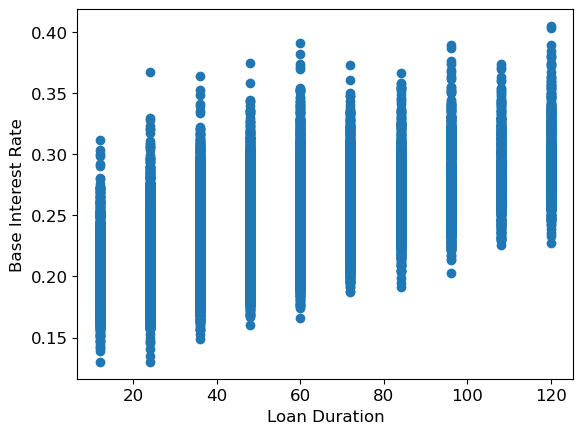

LoanDuration  BaseInterestRate
LoanDuration          1.000000          0.579215
BaseInterestRate      0.579215          1.000000

In [69]:
plt.scatter(x='LoanDuration',y='BaseInterestRate',data=loan)
plt.xlabel('Loan Duration')
plt.ylabel('Base Interest Rate')
plt.show()
loan[['LoanDuration','BaseInterestRate']].corr()

In [70]:
loan.groupby('LoanDuration')['BaseInterestRate'].sum()

LoanDuration
12     195.927430
24     422.140407
36     890.914611
48     933.923867
60     971.176617
72     518.721253
84     279.496448
96     274.329668
108    137.155453
120    158.697602
Name: BaseInterestRate, dtype: float64

#### It can be clearly seen that as the loan duration increases, the basic interst rate increases too. But it is also worth noticing that after 6 years, the base interest rate starts to fall down again to the initial level.

In [71]:
loan_df=loan[loan['LoanDuration']>=72]

In [72]:
loan_df['LoanPurpose'].value_counts()

LoanPurpose
Home                  1519
Debt Consolidation    1279
Auto                  1052
Education              765
Other                  510
Name: count, dtype: int64

In [73]:
loan_df.groupby('LoanPurpose')['BaseInterestRate'].sum()

LoanPurpose
Auto                  279.902259
Debt Consolidation    340.747761
Education             204.637725
Home                  406.646355
Other                 136.466324
Name: BaseInterestRate, dtype: float64

#### As per the data, the 'Home' loans have the highest base interest rate followed by 'Debt' consolidation. Also the highest count of loans taken for duration of equal to or more than 6 years are either 'Home Loan' or 'Debt' consolidation. There are others too but these 2 categories are the major. 

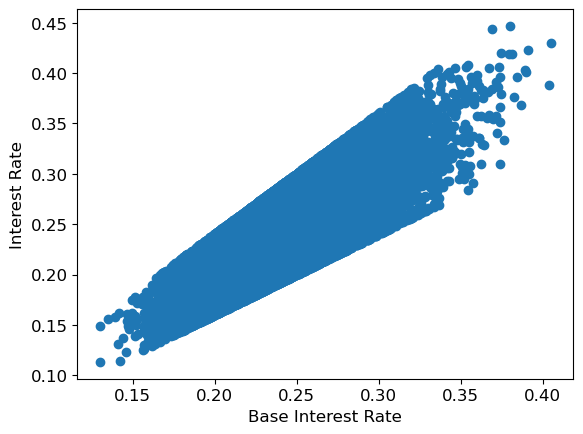

BaseInterestRate  InterestRate
BaseInterestRate          1.000000      0.834557
InterestRate              0.834557      1.000000

In [74]:
plt.scatter(x='BaseInterestRate',y='InterestRate',data=loan)
plt.xlabel('Base Interest Rate')
plt.ylabel('Interest Rate')
plt.show()
loan[['BaseInterestRate','InterestRate']].corr()

#### The above plot suggests if there are fluctuations in Base Interest rate it can mirror effects on the Interest Rates too.

In [75]:
loan.groupby('LoanPurpose')['InterestRate'].sum()

LoanPurpose
Auto                   964.125540
Debt Consolidation    1201.619927
Education              722.203097
Home                  1412.831903
Other                  481.419864
Name: InterestRate, dtype: float64

#### Since the base interest rate was higher for any kinds of loan, it was obvious the interest rate would be higher too.

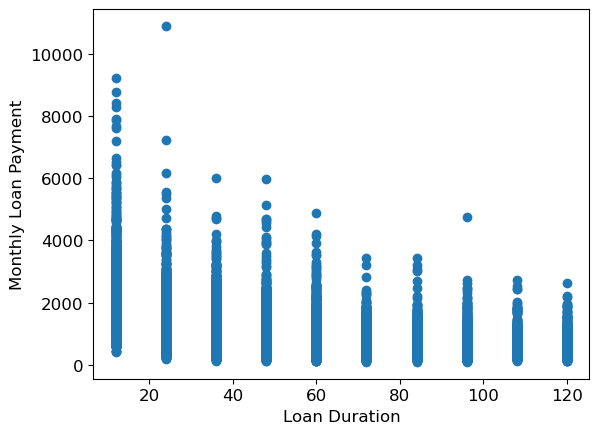

LoanDuration  MonthlyLoanPayment
LoanDuration            1.000000           -0.385495
MonthlyLoanPayment     -0.385495            1.000000

In [76]:
plt.scatter(x='LoanDuration',y='MonthlyLoanPayment',data=loan)
plt.xlabel('Loan Duration')
plt.ylabel('Monthly Loan Payment')
plt.show()
loan[['LoanDuration','MonthlyLoanPayment']].corr()

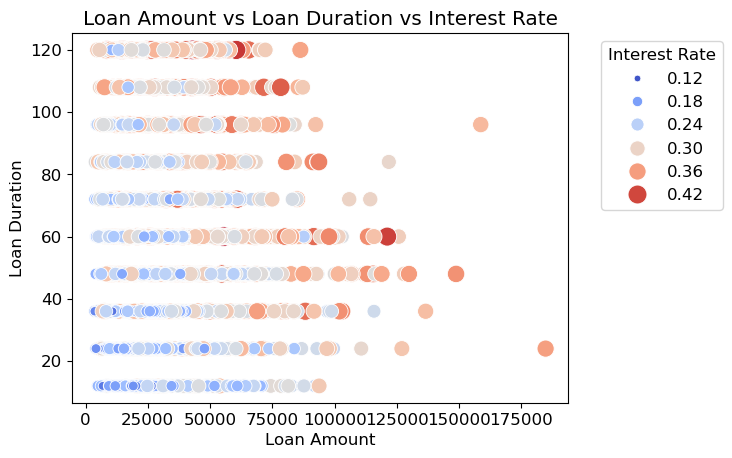

In [77]:
sns.scatterplot(
    x='LoanAmount', 
    y='LoanDuration', 
    hue='InterestRate', 
    size='InterestRate', 
    sizes=(20, 200), 
    palette='coolwarm', 
    data=loan
)
plt.title('Loan Amount vs Loan Duration vs Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Duration')
plt.legend(title='Interest Rate', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position if needed
plt.show()

#### It is relevant that as the duration goes higher for repay, the monthly charges becomes less. But in that case, the interest rate goes higher too, which was the case for 'Home' loans and 'Debt' consolidation.

In [78]:
loan['PreviousLoanDefaults'].value_counts()

PreviousLoanDefaults
0    17999
1     2001
Name: count, dtype: int64

#### Most of the people in the past hasn't taken loans prior to this loan.

In [79]:
loan['LoanApproved'].value_counts()

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

#### Seems majority of the people didn't get an approval for the loan.

In [80]:
loan.groupby('PreviousLoanDefaults')['LoanApproved'].count()

PreviousLoanDefaults
0    17999
1     2001
Name: LoanApproved, dtype: int64

#### People with no prior loans are less likely to get approval for a loan. Only 20% of the people got the approval who previously had taken loans.

#### Let's find out the factors that can create chances for securing a loan.

In [81]:
loan_correlation= loan.drop(columns=['ApplicationDate']+loan.select_dtypes(include=['object','category']).columns.tolist()).corr()
loan_corr = loan_correlation['LoanApproved'].sort_values(ascending=False)
loan_corr

LoanApproved                  1.000000
MonthlyIncome                 0.604101
AnnualIncome                  0.597900
NetWorth                      0.187892
TotalAssets                   0.184011
CreditScore                   0.142000
Age                           0.141029
Experience                    0.140755
LengthOfCreditHistory         0.105949
PaymentHistory                0.030804
JobTenure                     0.004997
UtilityBillsPaymentHistory    0.003303
NumberOfDependents            0.001717
SavingsAccountBalance         0.000961
CheckingAccountBalance        0.000660
DebtToIncomeRatio             0.000034
NumberOfOpenCreditLines      -0.004769
NumberOfCreditInquiries      -0.005885
CreditCardUtilizationRate    -0.010466
TotalLiabilities             -0.029434
PreviousLoanDefaults         -0.065343
MonthlyDebtPayments          -0.070415
BankruptcyHistory            -0.070751
LoanDuration                 -0.094558
MonthlyLoanPayment           -0.184272
LoanAmount               

#### Seems like if the Monthly income/Annual Income is high and the person is aged with a good net worth and assets he can be able to secure a loan. Also the person should possess a low risk score and the income to debt ratio should be small. Higher loan amount has been percieved by banks, particularly if the candidate isn't financially stable enough. This could indicate that loans with high base rates are offered to riskier profiles, which are less likely to be approved.

In [82]:
categorical_vars = loan.select_dtypes(include='object').columns
for var in categorical_vars:
    contingency_table = pd.crosstab(loan[var], loan['LoanApproved'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{var}: p-value = {p}")

ApplicationDate: p-value = 0.49667547194641115
EmploymentStatus: p-value = 4.349260610875047e-09
EducationLevel: p-value = 3.3045607434476096e-164
MaritalStatus: p-value = 0.6190037909522508
HomeOwnershipStatus: p-value = 8.138932140772307e-06
LoanPurpose: p-value = 0.1528671128648066


#### These variables does not possess a significance in association with the approval of the loans.

#### Let's check if we can find an optimal risk score for bifurcating loan approvals.

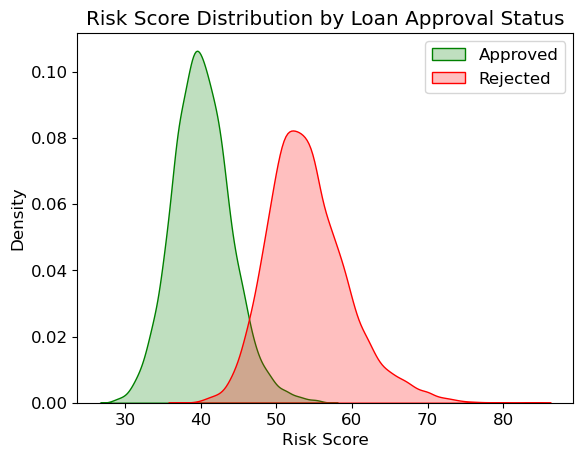

In [83]:
approved = loan[loan['LoanApproved'] == 1]['RiskScore']
rejected = loan[loan['LoanApproved'] == 0]['RiskScore']
sns.kdeplot(approved, label='Approved', shade=True, color='green')
sns.kdeplot(rejected, label='Rejected', shade=True, color='red')
plt.xlabel('Risk Score')
plt.ylabel('Density')
plt.title('Risk Score Distribution by Loan Approval Status')
plt.legend()
plt.show()

In [84]:
mean_approved = loan[loan['LoanApproved'] == 1]['RiskScore'].mean()
mean_rejected = loan[loan['LoanApproved'] == 0]['RiskScore'].mean()

print(f"Mean Risk Score (Approved): {mean_approved}")
print(f"Mean Risk Score (Rejected): {mean_rejected}")

Mean Risk Score (Approved): 40.133389121338915
Mean Risk Score (Rejected): 54.106307490144545


#### Since there was no overlap in the plots around the mean, the estimted score for approval is maximum upto 54.  

#### 5. Liabilities / Expenses
- ####  MonthlyDebtPayments
- ####  DebtToIncomeRatio
- ####  BankruptcyHistory
- ####  TotalLiabilities
- ####  UtilityBillsPaymentHistory
- ####  MonthlyLoanPayment
- ####  TotalDebtToIncomeRatio

#### Monthly Debt payments can be analyzed with Savings balance to check if they are the reason behind low savings and also can be checked monthly income since previously it has been seen that people with more income tends to have more debts.

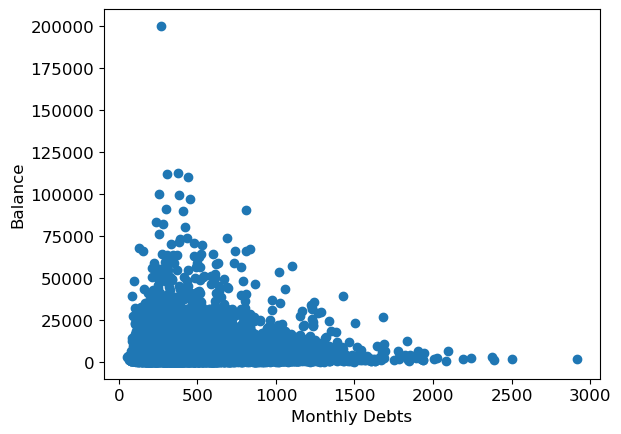

In [85]:
plt.scatter(x='MonthlyDebtPayments',y='SavingsAccountBalance',data=loan)
plt.xlabel('Monthly Debts')
plt.ylabel('Balance')
plt.show()

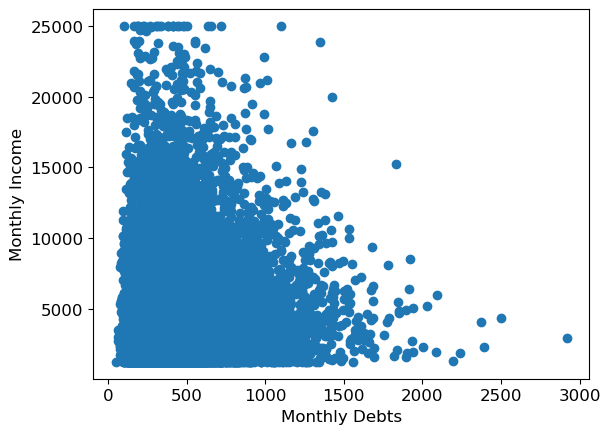

In [86]:
plt.scatter(x='MonthlyDebtPayments',y='MonthlyIncome',data=loan)
plt.xlabel('Monthly Debts')
plt.ylabel('Monthly Income')
plt.show()

In [87]:
loan[['MonthlyIncome','MonthlyDebtPayments']].corr()

MonthlyIncome  MonthlyDebtPayments
MonthlyIncome             1.000000            -0.000356
MonthlyDebtPayments      -0.000356             1.000000

#### It can't be interpreted using monthly income or monthly debt payments that accounts for low balance or vice-versa.

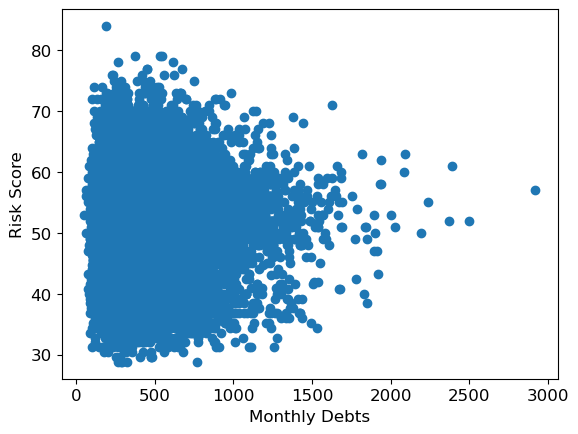

In [88]:
plt.scatter(x='MonthlyDebtPayments',y='RiskScore',data=loan)
plt.xlabel('Monthly Debts')
plt.ylabel('Risk Score')
plt.show()

#### Though it is not evident that higher monthly debts can increase your risk score.

In [89]:
loan.BankruptcyHistory.value_counts()

BankruptcyHistory
0    18952
1     1048
Name: count, dtype: int64

In [90]:
loan.groupby('BankruptcyHistory')['RiskScore'].describe()

count       mean       std   min   25%   50%    75%   max
BankruptcyHistory                                                             
0                  18952.0  50.076171  7.232150  28.8  45.6  51.0  55.00  72.0
1                   1048.0  63.255725  6.646646  39.2  61.0  64.0  67.25  84.0

#### People who have been bankrupted before seems to have a significant amount of higher risk scores.

In [91]:
approved_with_bankruptcy = loan[(loan['BankruptcyHistory'] == 1) & (loan['LoanApproved'] == 1)]
count_approved = approved_with_bankruptcy.shape[0]
total_with_bankruptcy = loan[loan['BankruptcyHistory'] == 1].shape[0]
percentage_approved = (count_approved / total_with_bankruptcy) * 100
print(f"Percentage of people with bankruptcy history approved for a loan: {percentage_approved:.2f}%")

Percentage of people with bankruptcy history approved for a loan: 11.07%


#### Also just 11% of people with bankruptcy history has been approved of a loan. They might have developed or gained their amount back which caused the approval for the loan.

In [92]:
loan.DebtToIncomeRatio.describe()

count    20000.000000
mean         0.285735
std          0.160211
min          0.001720
25%          0.161035
50%          0.264454
75%          0.390327
max          0.902253
Name: DebtToIncomeRatio, dtype: float64

#### Around 28% of the income of the peoples have been spent on clearing their debts.

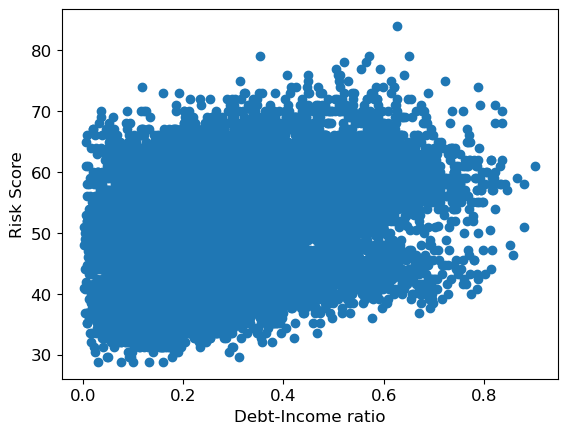

In [93]:
plt.scatter(x='DebtToIncomeRatio',y='RiskScore',data=loan)
plt.xlabel('Debt-Income ratio')
plt.ylabel('Risk Score')
plt.show()

In [94]:
loan[['DebtToIncomeRatio','RiskScore']].corr()

DebtToIncomeRatio  RiskScore
DebtToIncomeRatio             1.0000     0.3265
RiskScore                     0.3265     1.0000

#### It is evident that as the debt to income ratio increases for a person so are the risk scores.

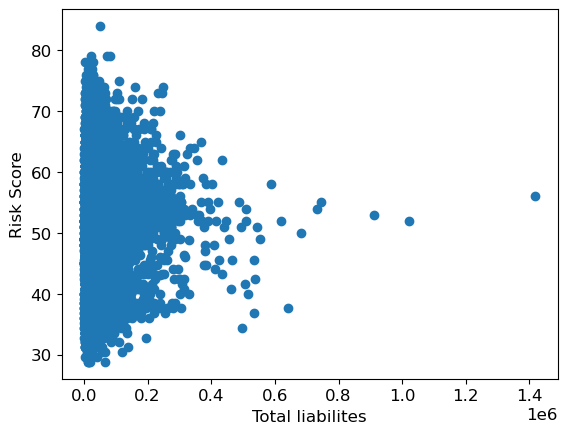

In [95]:
plt.scatter(x='TotalLiabilities',y='RiskScore',data=loan)
plt.xlabel('Total liabilites')
plt.ylabel('Risk Score')
plt.show()

#### Total liabilites increases with higher income but did not seem to increase risk scores.

In [96]:
loan[['UtilityBillsPaymentHistory','AnnualIncome']].corr()

UtilityBillsPaymentHistory  AnnualIncome
UtilityBillsPaymentHistory                    1.000000     -0.012351
AnnualIncome                                 -0.012351      1.000000

#### Utility payments are just household bills. They don't seem to have an impact on any other variables.

### In summary the variables with -
### correlarion >0.25 or <-0.25 assuming linearity

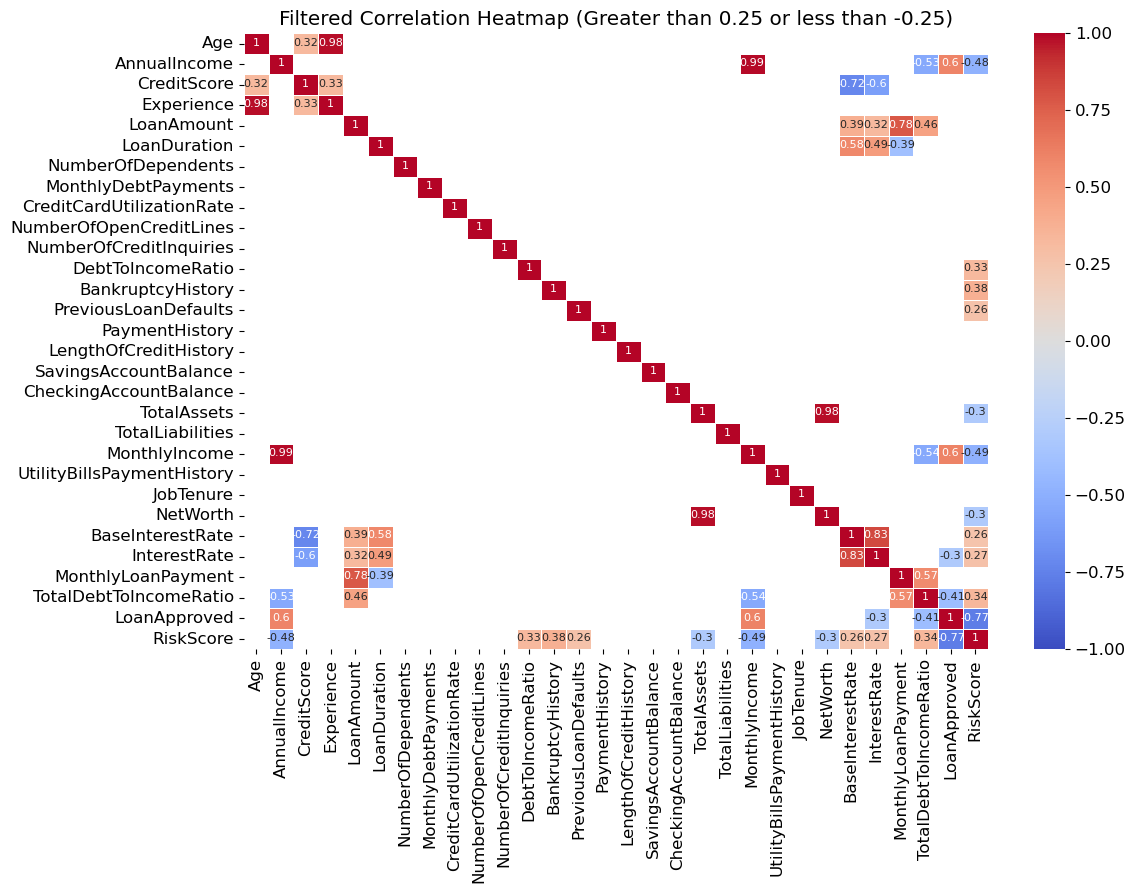

In [97]:
correlation_matrix=loan.drop(columns=['ApplicationDate']+loan.select_dtypes(include=['object','category']).columns.tolist()).corr()
filtered_corr = correlation_matrix.where((correlation_matrix > 0.25) | (correlation_matrix < -0.25))
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, annot_kws={"size": 8})
for text in plt.gca().texts:
    text.set_y(text.get_position()[1] - 0.05)
plt.title('Filtered Correlation Heatmap (Greater than 0.25 or less than -0.25)')
plt.show()

#### Let's start for data preprocessing now.

<Axes: xlabel='RiskScore', ylabel='Density'>

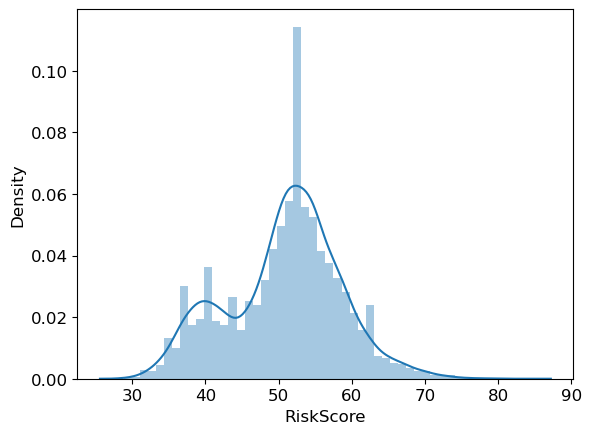

In [98]:
sns.distplot(loan.RiskScore)

#### The distribution of Risk scores seems pretty normal with a little extra spike around 40. Let's see if this had any outliers.

<Axes: ylabel='RiskScore'>

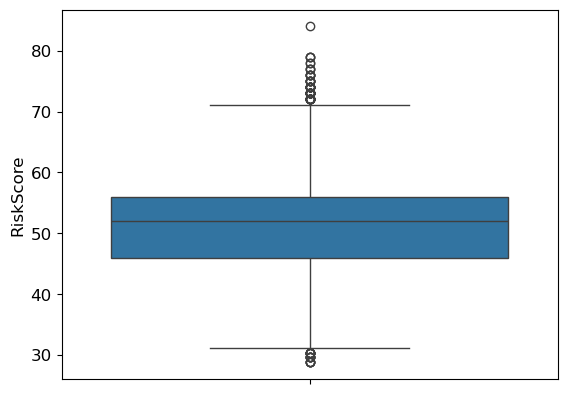

In [99]:
sns.boxplot(loan.RiskScore)

#### Let's check out outliers for all of the data.

In [100]:
def outliers(data):
    import pandas as pd
    outlier_data = pd.DataFrame()
    for col in data.columns:
        if data[col].dtypes in ['object', 'category']:
            outlier_data[col] = data[col]
        elif data[col].dtype == 'int64' and data[col].nunique() < 30:
            outlier_data[col] = data[col]
        else:
            outlier_data['Z_' + col] = (data[col] - data[col].mean()) / data[col].std()
    outliers_detected = outlier_data[
        outlier_data.filter(like='Z_').abs().max(axis=1) > 3
    ]
    return outliers_detected

In [101]:
z_score_df=outliers(loan)

In [102]:
z_score_df.head()

ApplicationDate     Z_Age  Z_AnnualIncome  Z_CreditScore EmploymentStatus  \
5       2018-01-06 -0.236829        2.952814       1.066479    Self-Employed   
11      2018-01-12 -0.494945       -1.094437       0.380169         Employed   
42      2018-02-12 -0.150791       -0.032254       0.380169         Employed   
54      2018-02-24  1.053747        5.291872       0.282124         Employed   
56      2018-02-26 -0.925137       -0.680989      -1.443455         Employed   

   EducationLevel  Z_Experience  Z_LoanAmount  LoanDuration MaritalStatus  \
5          Master     -0.134556     -0.703774            72       Married   
11       Bachelor     -0.576376      0.387649            24       Married   
42    High School      0.218900      0.051621            96       Married   
54       Bachelor      0.925811     -0.384725            84       Married   
56      Associate     -1.106559     -1.066241            24       Married   

    ...  Z_MonthlyIncome Z_UtilityBillsPaymentHistory  JobTenure  Z_NetWorth  \
5   ...         3.023398                    -0.363306          5   -0.383508   
11  ...        -1.104631                     0.348882          3   -0.361137   
42  ...        -0.021248                     0.342939          8    3.096520   
54  ...         5.409141                    -0.459315          8    0.140779   
56  ...        -0.682930                     0.241785          5    0.700845   

    Z_BaseInterestRate  Z_InterestRate  Z_MonthlyLoanPayment  \
5            -0.610855       -0.509626             -0.779785   
11           -0.831782       -1.343646              0.880547   
42            0.730842        1.150213             -0.338287   
54            0.354633       -0.497462             -0.670059   
56           -0.072042       -0.702250             -0.546916   

    Z_TotalDebtToIncomeRatio LoanApproved  Z_RiskScore  
5                  -0.964730            1    -0.869960  
11                  3.063534            0     0.672801  
42                 -0.671151            0    -0.484270  
54                 -1.090873            1    -1.589916  
56                 -0.375700            0    -0.355707  

[5 rows x 36 columns]

In [103]:
(loan.shape[0]-z_score_df.shape[0])/loan.shape[0]

0.8313

#### 17% of the data are outliers. Now let's find out the variables contributing most to this 17%.

In [104]:
def outlier_percentage(data):
    outlier_percentages = {}
    numerical_cols = data.select_dtypes(include=['int64','float64']).columns
    valid_cols = [col for col in numerical_cols if data[col].nunique() > 30]
    for col in valid_cols:
        z_scores = (data[col] - data[col].mean()) / data[col].std()
        outliers = (z_scores.abs() > 3).sum()
        outlier_percentage = (outliers / len(data)) * 100
        outlier_percentages[col] = outlier_percentage
    outlier_percentage_df = pd.DataFrame(
        list(outlier_percentages.items()), columns=['Variable', 'Outlier Percentage (%)']
    ).sort_values(by='Outlier Percentage (%)', ascending=False)
    return outlier_percentage_df
outlier_percentages_df = outlier_percentage(loan)
outlier_percentages_df

Variable  Outlier Percentage (%)
13               MonthlyIncome                   1.970
1                 AnnualIncome                   1.955
18          MonthlyLoanPayment                   1.870
12            TotalLiabilities                   1.865
10      CheckingAccountBalance                   1.850
19      TotalDebtToIncomeRatio                   1.845
11                 TotalAssets                   1.805
15                    NetWorth                   1.795
9        SavingsAccountBalance                   1.690
5          MonthlyDebtPayments                   1.620
4                   LoanAmount                   1.480
14  UtilityBillsPaymentHistory                   0.765
17                InterestRate                   0.590
2                  CreditScore                   0.560
16            BaseInterestRate                   0.510
8               PaymentHistory                   0.425
7            DebtToIncomeRatio                   0.390
6    CreditCardUtilizationRate                   0.375
3                   Experience                   0.235
0                          Age                   0.210
20                   RiskScore                   0.100

#### Monthly Income has the highest amount of outliers followed by Annual Income, loan payments, etc., A pattern can be seen that people with more income have more loan payment with higher interest rate and also they have more assets and liabilites. Also this can happen in the alternative way with much lower income than average. So, at first let's keep these outliers and do some modelling. If there are any effects, later we can either remove them or impute them.

#### Since, we found that much amount of variables had a influence on the other variables other than the Risk Scores, let's check out for the multicollinarity factor.

In [105]:
def calculate_vif(data):
    numerical_cols = data.select_dtypes(include=['number']).columns
    valid_cols = [col for col in numerical_cols if data[col].nunique() > 30]
    valid_data = data[valid_cols]
    valid_data = add_constant(valid_data)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = valid_data.columns
    vif_data["VIF"] = [variance_inflation_factor(valid_data.values, i) for i in range(valid_data.shape[1])]
    vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    return vif_data

In [106]:
vif_df = calculate_vif(loan)
vif_df

Variable          VIF
0                        const  1429.405675
1                MonthlyIncome    50.985408
2                 AnnualIncome    49.858176
3                     NetWorth    40.577729
4                  TotalAssets    39.797488
5                   Experience    29.760594
6                          Age    29.648680
7             BaseInterestRate     7.712563
8                   LoanAmount     5.955435
9           MonthlyLoanPayment     5.028335
10                 CreditScore     3.894883
11                InterestRate     3.403292
12      TotalDebtToIncomeRatio     2.892467
13                   RiskScore     2.072259
14            TotalLiabilities     1.682358
15           DebtToIncomeRatio     1.221767
16         MonthlyDebtPayments     1.130827
17   CreditCardUtilizationRate     1.022013
18              PaymentHistory     1.001674
19  UtilityBillsPaymentHistory     1.001467
20       SavingsAccountBalance     1.000923
21      CheckingAccountBalance     1.000743

#### The 'constant' is the baseline VIF.
#### Although the 'Annual Income', 'Monthly Income', 'Net Worth', 'Total Assets', 'Experience' and 'Age' looks intimidating but they are not since all of these are related variables like annual income is 'monthly income * 12', net worth and total assets is highly influenced by income and experience increases as the age. For now, we won't remove them and evaluate the performance.

#### All the other variable suggests moderate multicollinearity i.e.,(VIF<10)

#### Next step - Label encode the categorical variables.

In [107]:
def custom_one_hot_encode(df, additional_columns=None):
    if 'ApplicationDate' in df.columns:
        df = df.drop('ApplicationDate', axis='columns')
    categorical_columns = set(df.select_dtypes(include=['object', 'category']).columns)
    if additional_columns:
        categorical_columns.update(additional_columns)
    categorical_columns = [col for col in categorical_columns if col in df.columns]
    encoded_df = pd.get_dummies(df[categorical_columns], prefix_sep='_', drop_first=True, dtype='int')
    for col in categorical_columns:
        new_column_names = {c: f"{col}_{c.split('_', 1)[-1]}" for c in encoded_df.columns if c.startswith(col + "_")}
        encoded_df.rename(columns=new_column_names, inplace=True)
    return encoded_df

#### This function not only just encodes the categorical variables but also the binary/nominal variables like 'BankruptcyHistory', 'PreviousLoanDefaults' and 'LoanApproved'.

In [108]:
for cols in loan.columns:
    if (loan[cols].dtypes in ['int','float']) and (loan[cols].nunique()<=2):
        print(cols)

In [109]:
dummies = custom_one_hot_encode(loan, ['BankruptcyHistory', 'PreviousLoanDefaults', 'LoanApproved'])

In [110]:
dummies.shape

(20000, 19)

#### We would create two types of data :
#### 1. Scaled Data - for models like Regression and SVM which deals with gradients and distances.
#### 2. Uscaled Data - for tree based models.

In [111]:
int_cols=[]
for col in loan.columns:
    if ((loan[col].dtype in ['int','float']) or (loan[col].nunique()>30)) and (col!='ApplicationDate'):
        int_cols.append(col)
int_cols=int_cols[:20]

In [112]:
standardscaler=StandardScaler()
loan_scaled=standardscaler.fit_transform(loan[int_cols])

In [113]:
scaled_df=pd.DataFrame(loan_scaled,columns=int_cols)
scaled_df=pd.concat([dummies,scaled_df],axis='columns')
scaled_df.head()

BankruptcyHistory  LoanApproved  PreviousLoanDefaults  \
0                  0             0                     0   
1                  0             0                     0   
2                  0             0                     0   
3                  0             0                     0   
4                  0             1                     0   

   HomeOwnershipStatus_Other  HomeOwnershipStatus_Own  \
0                          0                        1   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   HomeOwnershipStatus_Rent  EducationLevel_Bachelor  \
0                         0                        0   
1                         0                        0   
2                         1                        1   
3                         0                        0   
4                         0                        0   

   EducationLevel_Doctorate  EducationLevel_High School  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           1   
4                         0                           0   

   EducationLevel_Master  ...  CheckingAccountBalance  TotalAssets  \
0                      1  ...               -0.258562     0.406853   
1                      0  ...                0.747084    -0.362264   
2                      0  ...               -0.395291    -0.594290   
3                      0  ...               -0.251881     0.065048   
4                      0  ...                1.424492     1.219738   

   TotalLiabilities  MonthlyIncome  UtilityBillsPaymentHistory  NetWorth  \
0         -0.361255      -0.474026                   -0.621121  0.463323   
1         -0.564174      -0.480067                    1.120606 -0.243267   
2          1.960232      -0.454410                    0.599385 -0.568953   
3         -0.653591       0.262471                    0.797576  0.230312   
4         -0.401403       1.126469                    1.172293  1.312148   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  
0         -1.111623     -0.272968           -0.729062               -0.652388  
1         -0.903420     -0.901165           -0.174264               -0.036378  
2         -0.605407     -0.629370           -0.363493                0.176962  
3          1.725605      1.464331            0.201463               -0.262848  
4         -1.181127     -1.495584           -0.861928               -0.979511  

[5 rows x 39 columns]

In [114]:
x=scaled_df
y=loan.RiskScore
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True,random_state=400)

#### Start the modelling with the Ordinary least square api from 'Statsmodels'.

In [115]:
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              RiskScore   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     6393.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:14:47   Log-Likelihood:                -43384.
No. Observations:               20000   AIC:                         8.685e+04
Df Residuals:                   19960   BIC:                         8.716e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [116]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [117]:
y_pred_lr=lr_model.predict(x_test)
print(r2_score(y_test,y_pred_lr))

0.9239415889604748


In [118]:
mse = mean_squared_error(y_test, y_pred_lr)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 4.58
Root Mean Squared Error (RMSE): 2.14
Mean Absolute Error (MAE): 1.64
R-squared (R²): 0.92


In [119]:
lr_model.coef_

array([ 1.15409462e+01, -1.10936709e+01,  5.76210882e+00, -6.19577694e-02,
       -3.22437618e-03, -5.27380571e-02, -9.51986686e-02, -2.63952731e-01,
        5.73318111e-02, -2.49262076e-01,  2.89040846e+00,  2.86790586e+00,
        3.65747966e-02,  1.70588822e-02,  1.48572873e-01,  2.99605773e-02,
        2.32893970e-02,  2.35639530e-02,  7.24612291e-02,  5.91527377e-02,
       -5.49016068e-01, -1.09928890e+00, -2.22483955e-01, -5.83471114e-02,
       -1.11881522e-01,  7.27180233e-01,  2.49039359e+00, -2.06124584e-02,
       -1.56040294e-02,  4.19919996e-03, -2.68918610e-01,  1.51098565e-01,
       -6.75284739e-03,  9.70987937e-03, -1.18951646e+00,  1.21458898e-02,
       -1.05985839e-01, -2.73170032e-01,  5.13008590e-01])

In [120]:
lr_model.intercept_

51.83694406873168

In [121]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.9251331 , 0.92588837, 0.92704488, 0.92482135, 0.92775502])

#### The linear regression model performs well with almost 92% explained variance in every fold and also with a very error score. Also the intercept is aligned to the average. Lot of variables have p-val<0.05 which shows their significance.

#### But let's try out some other models too.

In [122]:
svr_model=SVR()
svr_model.fit(x_train,y_train)

SVR()

In [123]:
y_pred_svr=svr_model.predict(x_test)
print(r2_score(y_test,y_pred_svr))

0.9028891279453094


In [124]:
mse = mean_squared_error(y_test, y_pred_svr)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 5.85
Root Mean Squared Error (RMSE): 2.42
Mean Absolute Error (MAE): 1.73
R-squared (R²): 0.90


In [125]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
cross_val_score(SVR(), x, y, cv=cv)

array([0.90322736, 0.90963489, 0.90235719, 0.90350616, 0.9038996 ])

#### The Support Vector Regressor has also given a good performance almost similar to the Linear Regression.

In [126]:
elastic_net = ElasticNet(alpha=1.0, l1_ratio=1.0)
elastic_net.fit(x_train, y_train)

ElasticNet(l1_ratio=1.0)

In [127]:
y_pred_elastic = elastic_net.predict(x_test)
mse = mean_squared_error(y_test, y_pred_elastic)
r2 = r2_score(y_test, y_pred_elastic)
print("Elastic Net Results:")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Elastic Net Results:
Mean Squared Error: 22.987
R^2 Score: 0.618


In [128]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}
elastic_net = ElasticNet(random_state=42)
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_net = best_model.predict(x_test)
print(f"Best Model MSE: {mean_squared_error(y_test, y_pred_net):.3f}")
print(f"Best Model R^2 Score: {r2_score(y_test, y_pred_net):.3f}")

Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 1.0}
Best Model MSE: 5.404
Best Model R^2 Score: 0.910


#### Elastic-Net works best with too many correlated and irrelevant features minimizing the losses using l1 and l2 regulaization. The best score of Elastic-net we got is 91% which is nearly as close to the best score of Linear Regression.

#### Now, let's try out for some tree based models with the unscaled data.

In [129]:
unscaled_df=pd.concat([loan[int_cols],dummies],axis='columns')
unscaled_df.head()

Age  AnnualIncome  CreditScore  Experience  LoanAmount  \
0   45         39948          617          22       13152   
1   38         39709          628          15       26045   
2   47         40724          570          26       17627   
3   58         69084          545          34       37898   
4   37        103264          594          17        9184   

   MonthlyDebtPayments  CreditCardUtilizationRate  DebtToIncomeRatio  \
0                  183                   0.354418           0.358336   
1                  496                   0.087827           0.330274   
2                  902                   0.137414           0.244729   
3                  755                   0.267587           0.436244   
4                  274                   0.320535           0.078884   

   PaymentHistory  SavingsAccountBalance  ...  EducationLevel_Master  \
0              29                   7632  ...                      1   
1              21                   4627  ...                      0   
2              20                    886  ...                      0   
3              27                   1675  ...                      0   
4              26                   1555  ...                      0   

   EmploymentStatus_Self-Employed  EmploymentStatus_Unemployed  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   MaritalStatus_Married  MaritalStatus_Single  MaritalStatus_Widowed  \
0                      1                     0                      0   
1                      0                     1                      0   
2                      1                     0                      0   
3                      0                     1                      0   
4                      1                     0                      0   

   LoanPurpose_Debt Consolidation  LoanPurpose_Education  LoanPurpose_Home  \
0                               0                      0                 1   
1                               1                      0                 0   
2                               0                      1                 0   
3                               0                      0                 1   
4                               1                      0                 0   

   LoanPurpose_Other  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 39 columns]

In [130]:
x=unscaled_df
y=loan.RiskScore

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=True,random_state=400)

In [132]:
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=param_grid_dt, scoring='r2', cv=5)
grid_search_dt.fit(x_train, y_train)
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
best_dt = grid_search_dt.best_estimator_

Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [133]:
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_leaf=4, min_samples_split=10)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [134]:
y_pred_dt = dt_regressor.predict(x_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Regressor Results:")
print(f"Mean Squared Error: {mse_dt:.3f}")
print(f"R^2 Score: {r2_dt:.3f}")

Decision Tree Regressor Results:
Mean Squared Error: 3.721
R^2 Score: 0.938


#### Here, Decision Tree outperforms Linear Regression by a small margin. Let's see what Random Forest has to offer.

In [135]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search_rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=10,  # Sample 10 parameter settings
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(x_train, y_train)
print("Best Parameters for Random Forest:", random_search_rf.best_params_)

Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [136]:
rf_regressor=RandomForestRegressor(n_estimators=100,min_samples_split=2,min_samples_leaf=2,max_depth=None)
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=2)

In [137]:
y_pred_rf = rf_regressor.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Regressor Results:")
print(f"Mean Squared Error: {mse_rf:.3f}")
print(f"R^2 Score: {r2_rf:.3f}")


Random Forest Regressor Results:
Mean Squared Error: 2.374
R^2 Score: 0.961


#### Random Forest Regressor outperforms all of the other model capturing 96% of the variance in the data also with a minimum squared error.

#### More complex models can capture more variance but I think that might overfit the data. Fore predicting the Risk scores, I guess I would use a more simpler model rather than any complex one. Now let's comapre the performances of these 5 models visually.

               Model  R^2 Score       MSE       MAE
4      Random Forest   0.960573  2.374149  1.192724
3      Decision Tree   0.938204  3.721120  1.491621
0  Linear Regression   0.923942  4.579961  1.642872
2        Elastic Net   0.910253  5.404246  1.807279
1                SVR   0.902889  5.847664  1.726910


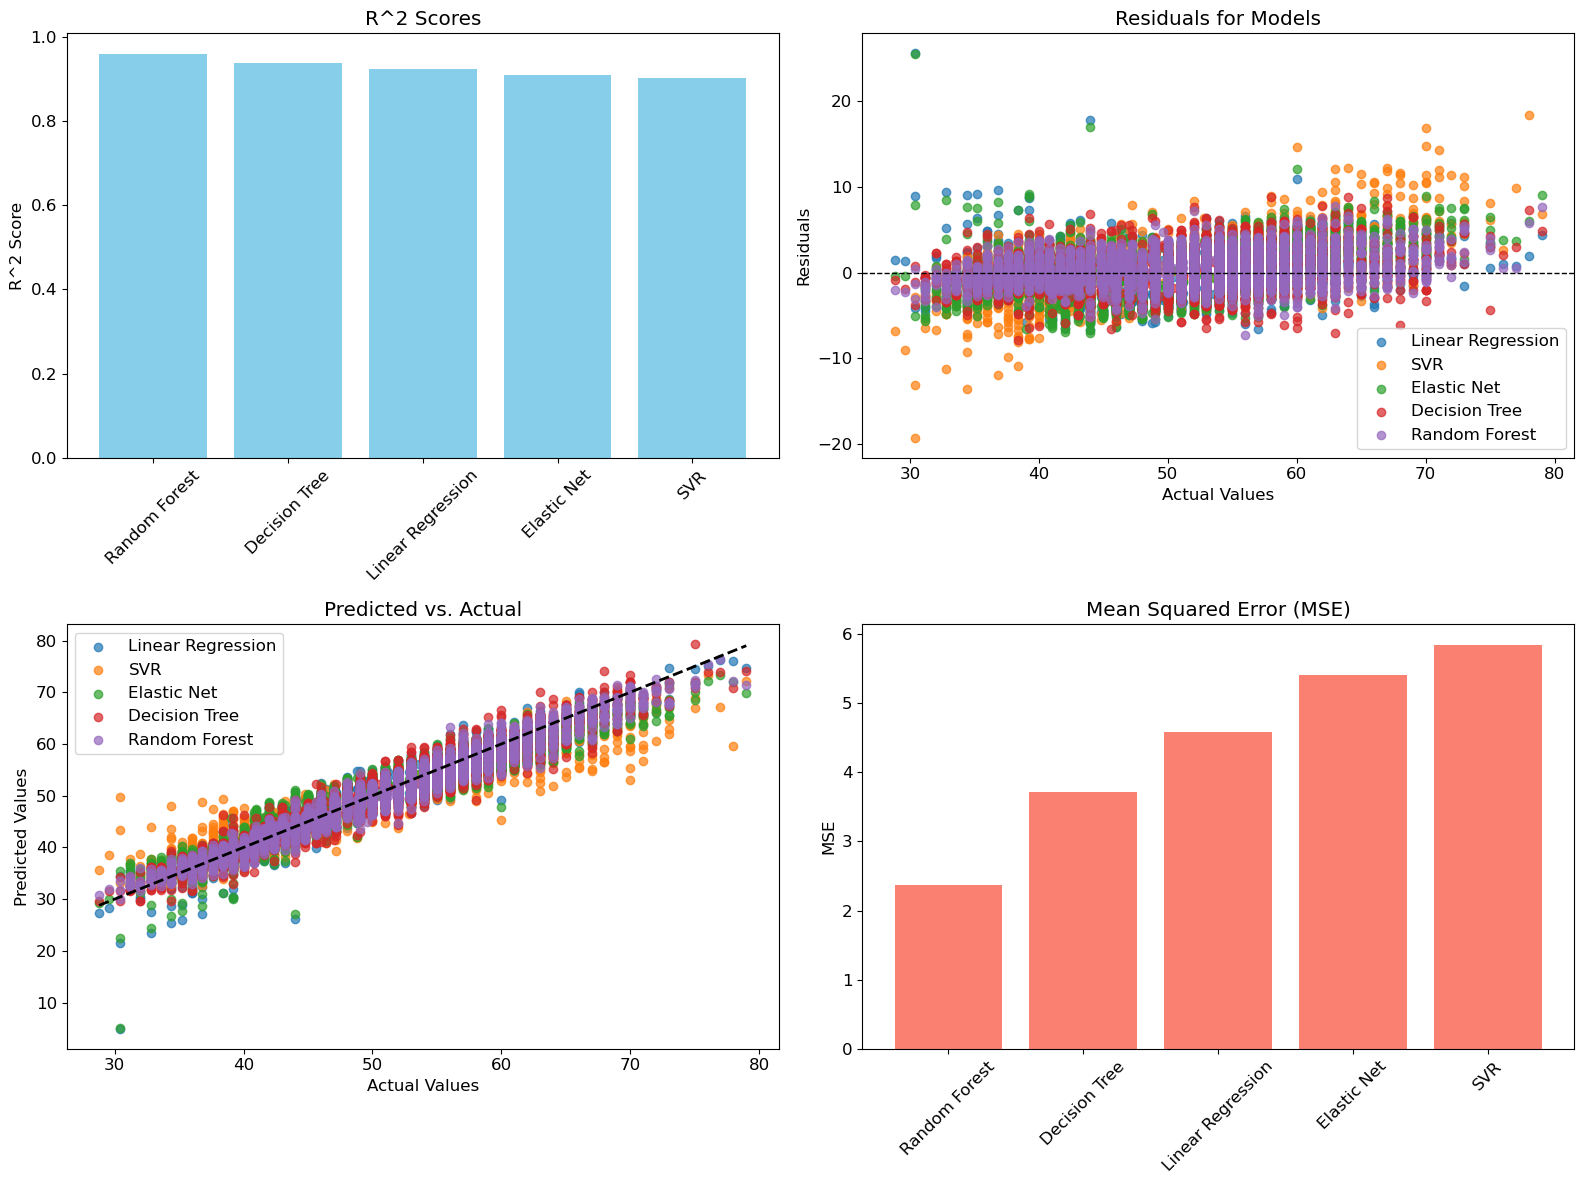

In [138]:
models = ["Linear Regression", "SVR", "Elastic Net", "Decision Tree", "Random Forest"]
predictions = [y_pred_lr, y_pred_svr, y_pred_net, y_pred_dt, y_pred_rf]
actuals = y_test

r2_scores = []
mse_scores = []
mae_scores = []

for pred in predictions:
    r2_scores.append(r2_score(actuals, pred))
    mse_scores.append(mean_squared_error(actuals, pred))
    mae_scores.append(mean_absolute_error(actuals, pred))

metrics_df = pd.DataFrame({
    "Model": models,
    "R^2 Score": r2_scores,
    "MSE": mse_scores,
    "MAE": mae_scores
}).sort_values(by="R^2 Score", ascending=False)


print(metrics_df)

# Visualizations
plt.figure(figsize=(16, 12))

# 1. Bar Chart for R^2 Scores
plt.subplot(2, 2, 1)
plt.bar(metrics_df["Model"], metrics_df["R^2 Score"], color='skyblue')
plt.title("R^2 Scores")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45)

# 2. Residual Plots
plt.subplot(2, 2, 2)
for model, pred in zip(models, predictions):
    residuals = actuals - pred
    plt.scatter(actuals, residuals, label=model, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("Residuals for Models")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.legend()

# 3. Predicted vs. Actual
plt.subplot(2, 2, 3)
for model, pred in zip(models, predictions):
    plt.scatter(actuals, pred, label=model, alpha=0.7)
plt.plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()], 'k--', linewidth=2)
plt.title("Predicted vs. Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

# 4. Bar Chart for MSE
plt.subplot(2, 2, 4)
plt.bar(metrics_df["Model"], metrics_df["MSE"], color='salmon')
plt.title("Mean Squared Error (MSE)")
plt.ylabel("MSE")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## This analysis and predictions was done in the simplest way possible. So if there is a room for improvement or correction please let me know in the comments. And thank you for going through my notebook.